# Investigation of TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<font color=blue> On average, producing a movie costs over hundrend million dollars; an amount of money that raises questions about the features that make a successful movie. A data set that contains information about 10,000 movies collected from The Movie Database (TMDb) will be used to invistigate features such Genre, keywords, cast, company production, runtime,  ... etc. 
</font> 
<br>

In [1]:
# import packages 
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np

# to present tables side by side 
from IPython.core.display import HTML
def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

#reference: https://github.com/epmoyer/ipy_table/issues/24

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#Read the dataset
os.chdir(r"/Users/z10392/Documents/Self development/udacity/DA projects")
data=pd.read_excel('movies.xlsx')
data.head(3)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500  tt2908446   13.112507  110000000   295238201           Insurgent   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   

                                         homepage          director  \
0                   http://www.jurassicworld.com/   Colin Trevorrow   
1                     http://www.madmaxmovie.com/     George Miller   
2  http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   

                      tagline      ...       \
0           The park is open.      ...        
1          What a Lovely Day.      ...        
2  One Choice Can Destroy You      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18       2480   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  

[3 rows x 21 columns]

* <font color=blue> Some pieces of information do not exhibit any pattern such as the overview, the tagline, and the homepage. These columns could be removed.</font>

<br>
* <font color=blue> Important features such as cast, kewords, director, production companies, and genres contain multiple values separated by pipe (|) characters. These columns will be split and then their unique values will be stacked again in a list. Then each movie will be checked against each unique value </font>

<br>
* <font color=blue> The two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. These will be used in this project instead of the original revenue and budget  </font>  

<br>
* <font color=blue> There are several zero values for the revenue and budget columns, these will be removed as they would affect the analysis </font>  

### Data Cleaning

<br>
<font color=blue> The dataset will be cleaned as discussed in the the previous section:  </font>  

* <font color=blue> Columns to be dropped: </font>  

In [3]:
del data['budget']
del data['revenue']  # As adjusted revenue and budget wil be used 

del data['homepage']
del data['original_title']
del data['tagline']
del data['overview'] # These are lengthy strings and has no pattern to study (although could be studied later)  

del data['release_date'] #release year would be better than full date 

data.head(3)

id    imdb_id  popularity  \
0  135397  tt0369610   32.985763   
1   76341  tt1392190   28.419936   
2  262500  tt2908446   13.112507   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   

                                            keywords  runtime  \
0  monster|dna|tyrannosaurus rex|velociraptor|island      124   
1   future|chase|post-apocalyptic|dystopia|australia      120   
2  based on novel|revolution|dystopia|sequel|dyst...      119   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   

                                production_companies  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...        2480   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08

* <font color=blue> Check if there are missing values or duplicate rows </font>  

In [4]:
data.describe()

id    popularity       runtime    vote_count  vote_average  \
count   10866.000000  10866.000000  10866.000000  10866.000000  10866.000000   
mean    66064.177434      0.646441    102.070863    217.389748      5.974922   
std     92130.136561      1.000185     31.381405    575.619058      0.935142   
min         5.000000      0.000065      0.000000     10.000000      1.500000   
25%     10596.250000      0.207583     90.000000     17.000000      5.400000   
50%     20669.000000      0.383856     99.000000     38.000000      6.000000   
75%     75610.000000      0.713817    111.000000    145.750000      6.600000   
max    417859.000000     32.985763    900.000000   9767.000000      9.200000   

       release_year    budget_adj   revenue_adj  
count  10866.000000  1.086600e+04  1.086600e+04  
mean    2001.322658  1.755104e+07  5.136436e+07  
std       12.812941  3.430616e+07  1.446325e+08  
min     1960.000000  0.000000e+00  0.000000e+00  
25%     1995.000000  0.000000e+00  0.000000e+00  
50%     2006.000000  0.000000e+00  0.000000e+00  
75%     2011.000000  2.085325e+07  3.369710e+07  
max     2015.000000  4.250000e+08  2.827124e+09

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


* <font color=blue> All columns of type __int__ has no Null values to deal with as the counts = 10866 from the .describe()  match all the non-null count from .info  </font>  

* <font color=blue> Check for duplicates </font>  

In [6]:
sum(data.duplicated())

1

In [7]:
data.drop_duplicates(inplace=True)

* <font color=blue> Remove zero rows from revenue_adj and budget_adj columns </font>  

In [8]:
data = data[data.budget_adj != 0]
data = data[data.revenue_adj != 0]
data.head()

id    imdb_id  popularity  \
0  135397  tt0369610   32.985763   
1   76341  tt1392190   28.419936   
2  262500  tt2908446   13.112507   
3  140607  tt2488496   11.173104   
4  168259  tt2820852    9.335014   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                                            keywords  runtime  \
0  monster|dna|tyrannosaurus rex|velociraptor|island      124   
1   future|chase|post-apocalyptic|dystopia|australia      120   
2  based on novel|revolution|dystopia|sequel|dyst...      119   
3              android|spaceship|jedi|space opera|3d      136   
4                car race|speed|revenge|suspense|car      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot        5292   
4  Universal Pictures|Original Film|Media Rights ...        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

* <font color=blue> Split Cells that have multiple inputs: </font>  

In [9]:
# genres
genres_series = pd.Series(data["genres"])
genres_split = genres_series.str.split("|",expand=True)
genres_list=genres_split.stack().unique()

# cast
cast_series = pd.Series(data["cast"])
cast_split = cast_series.str.split("|",expand=True)
cast_list=cast_split.stack().unique()

# companies
companies_series = pd.Series(data["production_companies"])
companies_split = companies_series.str.split("|",expand=True)
companies_list=companies_split.stack().unique()

# Keywords
keywords_series = pd.Series(data["keywords"])
keywords_split = keywords_series.str.split("|",expand=True)
keywords_list=keywords_split.stack().unique()

# director_list
director_series = pd.Series(data["director"])
director_split = director_series.str.split("|",expand=True)
director_list=director_split.stack().unique()

#For example
print(genres_list)

[u'Action' u'Adventure' u'Science Fiction' u'Thriller' u'Fantasy' u'Crime'
 u'Western' u'Drama' u'Family' u'Animation' u'Comedy' u'Mystery'
 u'Romance' u'War' u'History' u'Music' u'Horror' u'Documentary' u'Foreign'
 u'TV Movie']


<font color=coral> __Note:__</font>  <font color=blue> Appending the above lists to the original table slows down the code. Thus they will be appended only when needed</font>  

<a id='eda'></a>
## Exploratory Data Analysis

<br>
* <font color=blue> There are too many features to invistigate, of which some are __numerical__, such as popularity, runtime, vote_count, vote_average, release_year, budget_adj, revenue_adj while others are __non-numerical__, such as cast, director, keywords, genres, and production_companies. Each type will be considered separetly.  </font>  

#### Non-numerical features

### Geners

#### <font color=coral>(Question#1)</font> Which Genres has the highest numbers of movie release? 

In [10]:
genres_Counts=genres_split.stack().value_counts()

Text(0.5,1,'Movies release per Genre')

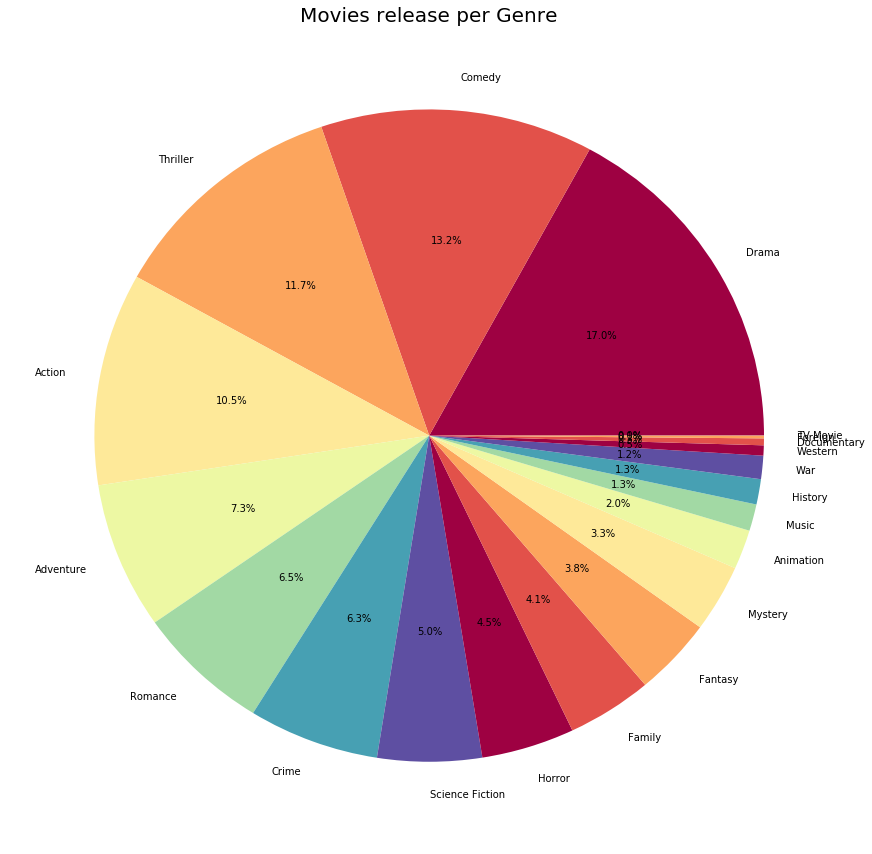

In [11]:
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
genres_Counts.plot(kind='pie',figsize=(15,15),autopct='%1.1f%%',colors=colors)
plt.ylabel("")
plt.title("Movies release per Genre",fontsize=20)

* <font color=blue> The top 5 Genres in terms of number of movies produced are summarized below </font>  


In [12]:
pd.DataFrame({'Release_Count': genres_Counts.nlargest(5)})

Release_Count
Drama               1756
Comedy              1358
Thriller            1204
Action              1085
Adventure            749

#### <font color=coral>(Question#2)</font> How did the number of movies released change over time for each Genre?

In [13]:
# prepare a table to append Genres columns check
genres_table = data[['id','popularity','release_year','revenue_adj','budget_adj','vote_average','director','production_companies']].reset_index(drop=True)

# Check if the movie fall under each genre
for genre in genres_list:
    genres_table[genre] = data['genres'].str.contains(genre)
    
genres_table.head(3)

id  popularity  release_year   revenue_adj    budget_adj  vote_average  \
0  135397   32.985763          2015  1.392446e+09  1.379999e+08           6.5   
1   76341   28.419936          2015  3.481613e+08  1.379999e+08           7.1   
2  262500   13.112507          2015  2.716190e+08  1.012000e+08           6.3   

           director                               production_companies Action  \
0   Colin Trevorrow  Universal Studios|Amblin Entertainment|Legenda...   True   
1     George Miller  Village Roadshow Pictures|Kennedy Miller Produ...   True   
2  Robert Schwentke  Summit Entertainment|Mandeville Films|Red Wago...  False   

  Adventure   ...    Comedy Mystery Romance    War History  Music Horror  \
0      True   ...     False   False   False  False   False  False  False   
1      True   ...     False   False   False  False   False  False  False   
2      True   ...     False   False   False  False   False  False  False   

  Documentary Foreign TV Movie  
0       False   False    False  
1       False   False    False  
2       False   False    False  

[3 rows x 28 columns]

In [14]:
# create genre by year table 
genre_by_year = pd.DataFrame(columns=['release_year']) 

for column in genres_table.iloc[:,8:]:
    Year_genre = pd.DataFrame(genres_table[genres_table[column] == True].groupby(['release_year'])[column].count())
    genre_by_year = genre_by_year.merge(Year_genre,  on='release_year', how='outer') 

genre_by_year.head()

release_year  Action  Adventure  Science Fiction  Thriller  Fantasy  Crime  \
0          1964     3.0        1.0              NaN       2.0      NaN    1.0   
1          1968     1.0        1.0              1.0       NaN      NaN    NaN   
2          1972     1.0        NaN              NaN       1.0      NaN    NaN   
3          1973     1.0        1.0              1.0       NaN      NaN    NaN   
4          1974     3.0        1.0              NaN       3.0      NaN    2.0   

   Western  Drama  Family    ...     Comedy  Mystery  Romance  War  History  \
0      NaN    3.0     NaN    ...        2.0      NaN      NaN  NaN      1.0   
1      NaN    3.0     NaN    ...        2.0      NaN      1.0  NaN      NaN   
2      NaN    2.0     NaN    ...        2.0      1.0      1.0  NaN      NaN   
3      NaN    NaN     NaN    ...        NaN      NaN      NaN  NaN      NaN   
4      NaN    2.0     2.0    ...        3.0      NaN      1.0  NaN      NaN   

   Music  Horror  Documentary  Foreign  TV Movie  
0    NaN     NaN          NaN      NaN       NaN  
1    NaN     1.0          NaN      NaN       NaN  
2    NaN     NaN          NaN      NaN       NaN  
3    NaN     NaN          NaN      NaN       NaN  
4    1.0     NaN          NaN      NaN       NaN  

[5 rows x 21 columns]

In [15]:
genre_by_year.set_index(['release_year'], inplace=True)

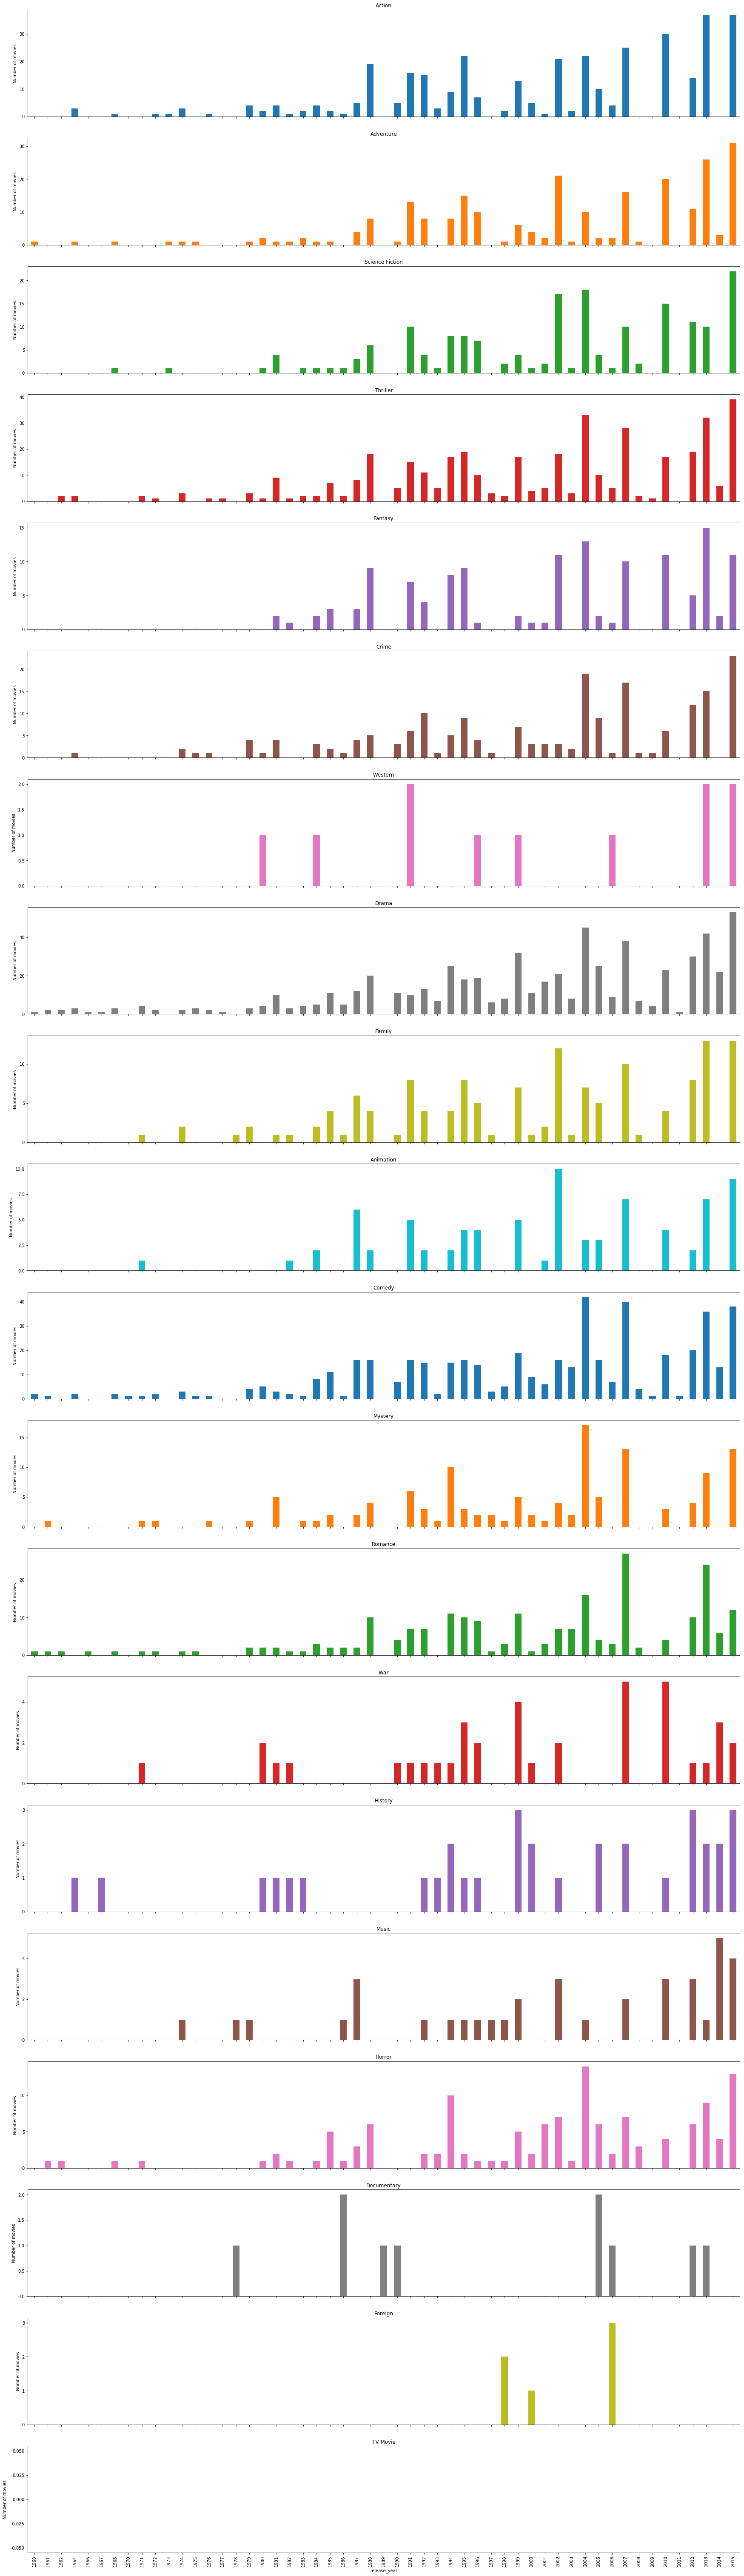

In [16]:
sub_titles = []
for genre in genres_list:
    sub_titles.append(genre +' movies annual release')

# data
df = genre_by_year.sort_values('release_year', ascending=True)

# plot
axes = df.plot(kind='bar', figsize=(30, 110), subplots=True, sharex=True, legend=False)

for i in range(0,20):
    axes[i].set_ylabel('Number of movies')

rc={'axes.labelsize': 25, 'font.size': 25, 'legend.fontsize': 25, 'axes.titlesize': 25}
plt.rcParams.update(**rc)

* <font color=blue> It is observed that, in general, the number of movies for most of the genres is increasing over time with similar patterns. There are exceptions such as Western, Documentary, War, and Foreign Genres. However, this could be due to the lack of data for those Genres </font>

#### <font color=coral>(Question#3)</font> Are the Genres with highest number of movies produced necessarily the ones with highest average revenue, popularity, budget or votes?

In [17]:
genres_means_table = pd.DataFrame({'Genre':genres_list})

#Calculate mean_popularity
genres_mean_popularity = []
for column in genres_table.iloc[:,8:]:
    genres_mean_popularity.append(genres_table.loc[genres_table[column] == True, 'popularity'].mean())
    
genres_means_table['Mean_popularity'] = pd.Series(genres_mean_popularity)    

#Calculate mean_revenue
genres_mean_revenue = []
for column in genres_table.iloc[:,8:]:
    genres_mean_revenue.append(genres_table.loc[genres_table[column] == True, 'revenue_adj'].mean())
    
genres_means_table['Mean_revenue_adj'] = pd.Series(genres_mean_revenue)

#Calculate mean_budget
genres_mean_budget = []
for column in genres_table.iloc[:,8:]:
    genres_mean_budget.append(genres_table.loc[genres_table[column] == True, 'budget_adj'].mean())
    
genres_means_table['Mean_budget_adj'] = pd.Series(genres_mean_budget)

#Calculate mean_vote
genres_mean_vote = []
for column in genres_table.iloc[:,8:]:
    genres_mean_vote.append(genres_table.loc[genres_table[column] == True, 'vote_average'].mean())
    
genres_means_table['Mean_vote'] = pd.Series(genres_mean_vote)

genres_means_table['Genre']=pd.DataFrame(genres_list)
genres_means_table.head()

Genre  Mean_popularity  Mean_revenue_adj  Mean_budget_adj  \
0           Action         1.444074      1.554579e+08     4.583983e+07   
1        Adventure         1.676263      1.666313e+08     4.891150e+07   
2  Science Fiction         1.869904      1.770962e+08     5.224944e+07   
3         Thriller         1.438124      1.308610e+08     4.362277e+07   
4          Fantasy         1.274493      1.395380e+08     4.818813e+07   

   Mean_vote  
0   6.225141  
1   6.232636  
2   6.188764  
3   6.135038  
4   6.216418

In [18]:
genres_means_table.set_index(['Genre'], inplace=True)

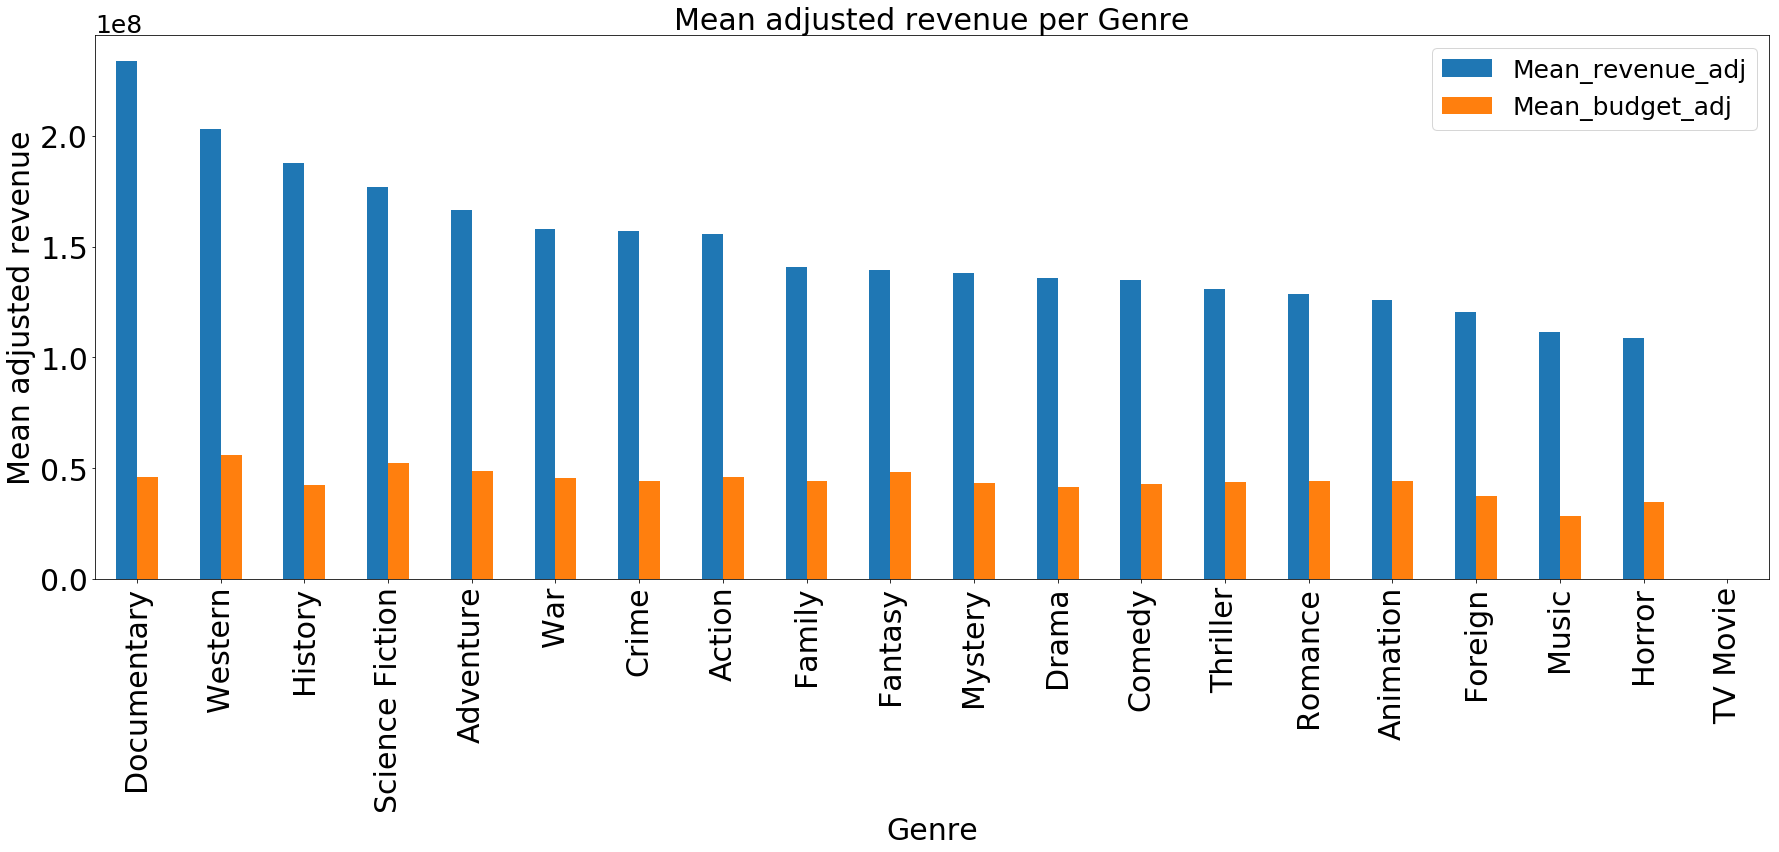

In [19]:
genres_means_table[['Mean_revenue_adj','Mean_budget_adj']].sort_values('Mean_revenue_adj', ascending=False).plot(kind='bar',figsize=(30,10),fontsize=30)
plt.ylabel('Mean adjusted revenue',fontsize=30)
plt.xlabel('Genre',fontsize=30)
plt.title("Mean adjusted revenue per Genre",fontsize=30)

plt.rcParams.update(**{'legend.fontsize': 40})

* <font color=blue> The top 2 Genres are the same in temrs of Revenue and Budget. </font>

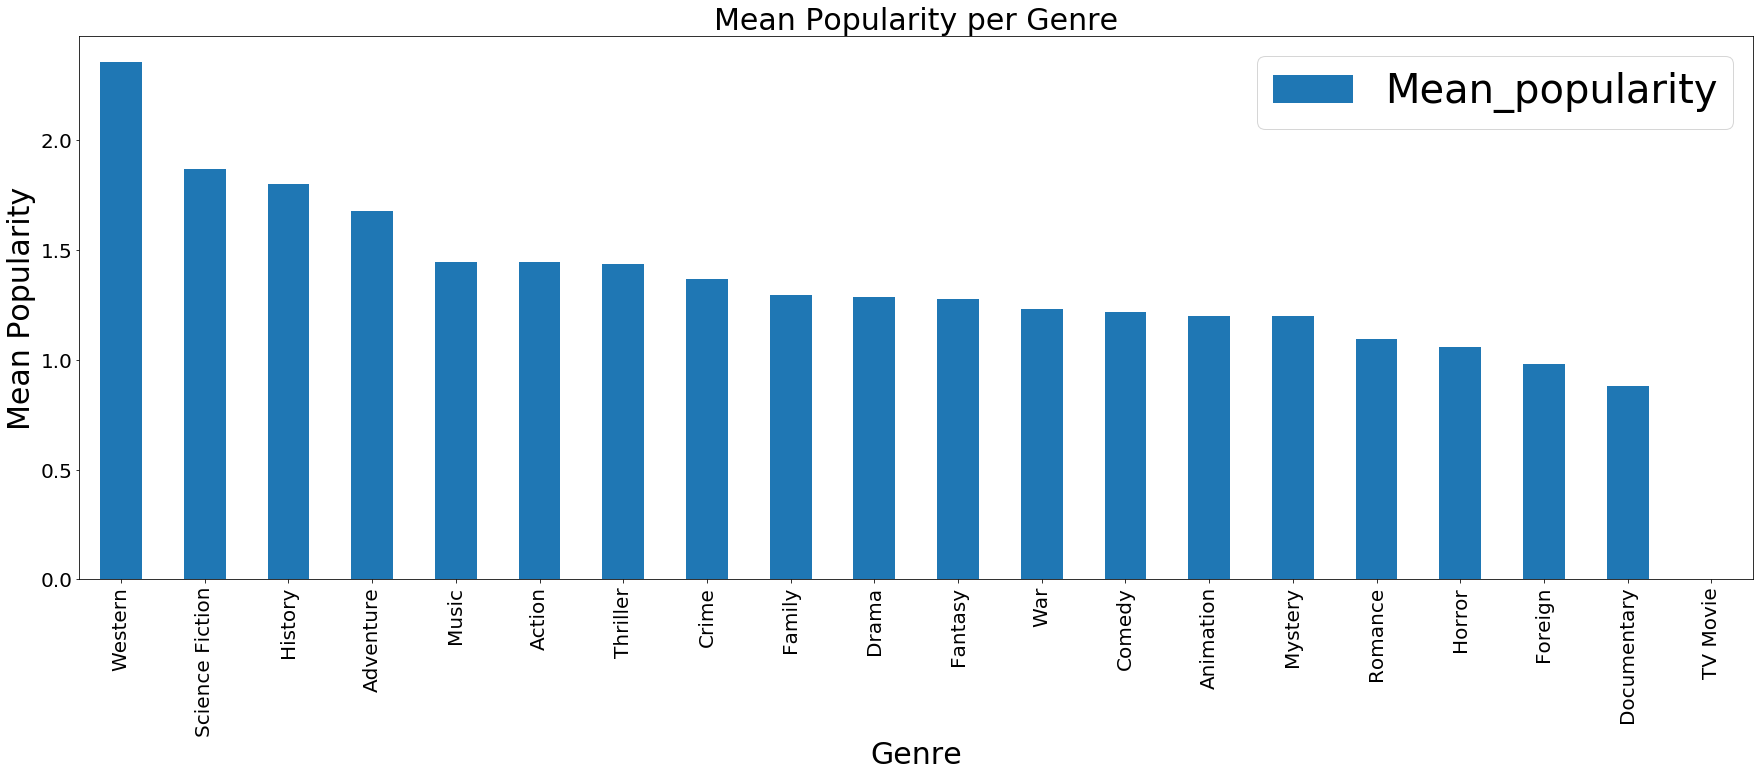

In [20]:
genres_means_table[['Mean_popularity']].sort_values('Mean_popularity', ascending=False).plot(kind='bar',figsize=(30,10),fontsize=20)
plt.ylabel('Mean Popularity',fontsize=30)
plt.xlabel('Genre',fontsize=30)
plt.title("Mean Popularity per Genre",fontsize=30)

plt.rcParams.update(**{'legend.fontsize': 40})

* <font color=blue> Western and History Genres are among the the top 3 in terms of Revenue and popularity. However, Documentary is the is the first in terms of revenue but last in terms of popularity. </font>

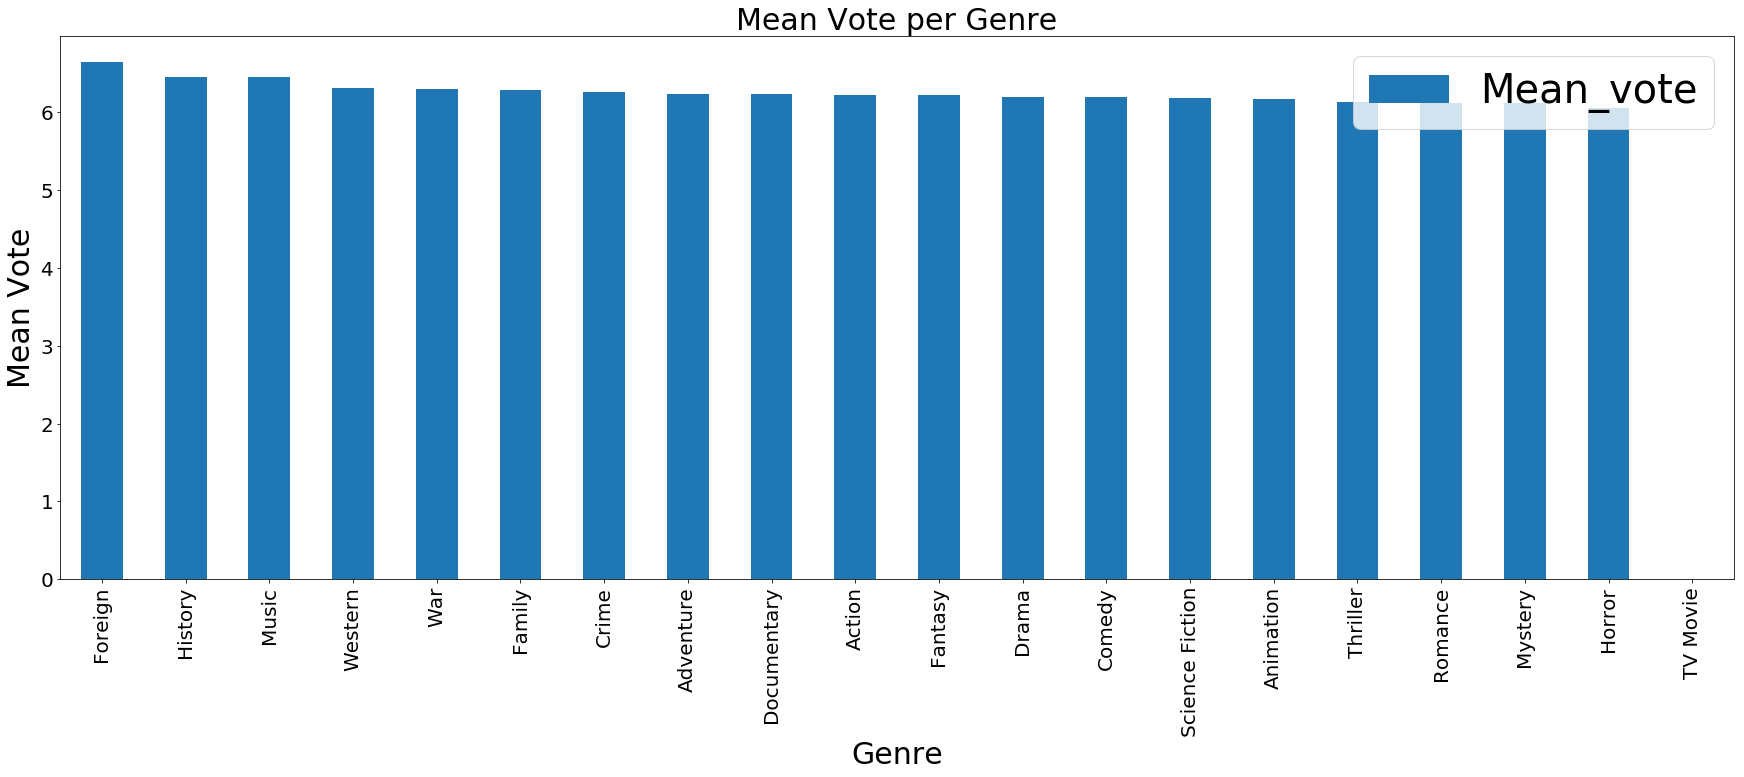

In [21]:
genres_means_table[['Mean_vote']].sort_values('Mean_vote', ascending=False).plot(kind='bar',figsize=(30,10),fontsize=20)
plt.ylabel('Mean Vote',fontsize=30)
plt.xlabel('Genre',fontsize=30)
plt.title("Mean Vote per Genre",fontsize=30)

plt.rcParams.update(**{'legend.fontsize': 40})

* <font color=blue> there is no significant differnece in terms of mean vote </font>

In [22]:
# A closer look using tables
df0= pd.DataFrame({'Release_Count': genres_Counts}).head()
df1= genres_means_table[['Mean_popularity']].sort_values('Mean_popularity', ascending=False).head()
df2= genres_means_table[['Mean_revenue_adj']].sort_values('Mean_revenue_adj', ascending=False).head()
multi_table([ df0, df1, df2])

* <font color=blue> The top 5 Genres are quite similar in terms of popularity and Revenue (despite the changed order). However, of those, only Adventure is among the top 5 in temrs of number of movies released. Thus, it is not true that the movies with high popularity and revenue are the most produced. It seems that the budget is possibly related to this. </font> 

In [23]:
#Define a function to color specific information
def color_specific(value):
  if value == 'Thriller' or value == 'Romance' or value == 'Comedy'or value == 'Drama'or value == 'Action' or value == 'Adventure':
    color = 'red'
  else:
    color = 'black'
  return 'color: %s' % color
#https://community.modeanalytics.com/gallery/python_dataframe_styling/

df0= pd.DataFrame({'Release_Count': genres_Counts}).head().reset_index().style.applymap(color_specific)
df1= genres_means_table[['Mean_popularity']].sort_values('Mean_popularity', ascending=False).reset_index().iloc[5:16,:].style.applymap(color_specific)
df2= genres_means_table[['Mean_revenue_adj']].sort_values('Mean_revenue_adj', ascending=False).reset_index().iloc[5:16,:].style.applymap(color_specific)
df3= genres_means_table[['Mean_budget_adj']].sort_values('Mean_budget_adj',ascending=False).reset_index().iloc[5:16,:].style.applymap(color_specific)
multi_table([ df0, df3, df1, df2])

* <font color=blue> The genres with highest number of movies produced are in the middle (5 to 15) of the budget list as well as the popularity and revenue lists. It Looks like .. produce more movies of lower budget but still has fair enough popularity and revenue </font> 

#### <font color=coral>(Question#4)</font> Is there correlation between any of the Genres and popularity or revenue?

In [24]:
#Encode the Genres to check for correlation
data_genre = data

#Remove other numerical data that might congest the  output
del data_genre['vote_count']
del data_genre['vote_average']
del data_genre['imdb_id']

# add genres check
for genre in genres_list:
    data_genre[genre] = data['genres'].str.contains(genre).apply(lambda x:1 if x else 0)

data_genre.head(3)

id  popularity                                               cast  \
0  135397   32.985763  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1   76341   28.419936  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  262500   13.112507  Shailene Woodley|Theo James|Kate Winslet|Ansel...   

           director                                           keywords  \
0   Colin Trevorrow  monster|dna|tyrannosaurus rex|velociraptor|island   
1     George Miller   future|chase|post-apocalyptic|dystopia|australia   
2  Robert Schwentke  based on novel|revolution|dystopia|sequel|dyst...   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   

                                production_companies  release_year  \
0  Universal Studios|Amblin Entertainment|Legenda...          2015   
1  Village Roadshow Pictures|Kennedy Miller Produ...          2015   
2  Summit Entertainment|Mandeville Films|Red Wago...          2015   

     budget_adj    ...     Comedy  Mystery  Romance  War  History  Music  \
0  1.379999e+08    ...          0        0        0    0        0      0   
1  1.379999e+08    ...          0        0        0    0        0      0   
2  1.012000e+08    ...          0        0        0    0        0      0   

   Horror  Documentary  Foreign  TV Movie  
0       0            0        0         0  
1       0            0        0         0  
2       0            0        0         0  

[3 rows x 31 columns]

Text(0.5,1,'Correlation: Genres and other numerical features ')

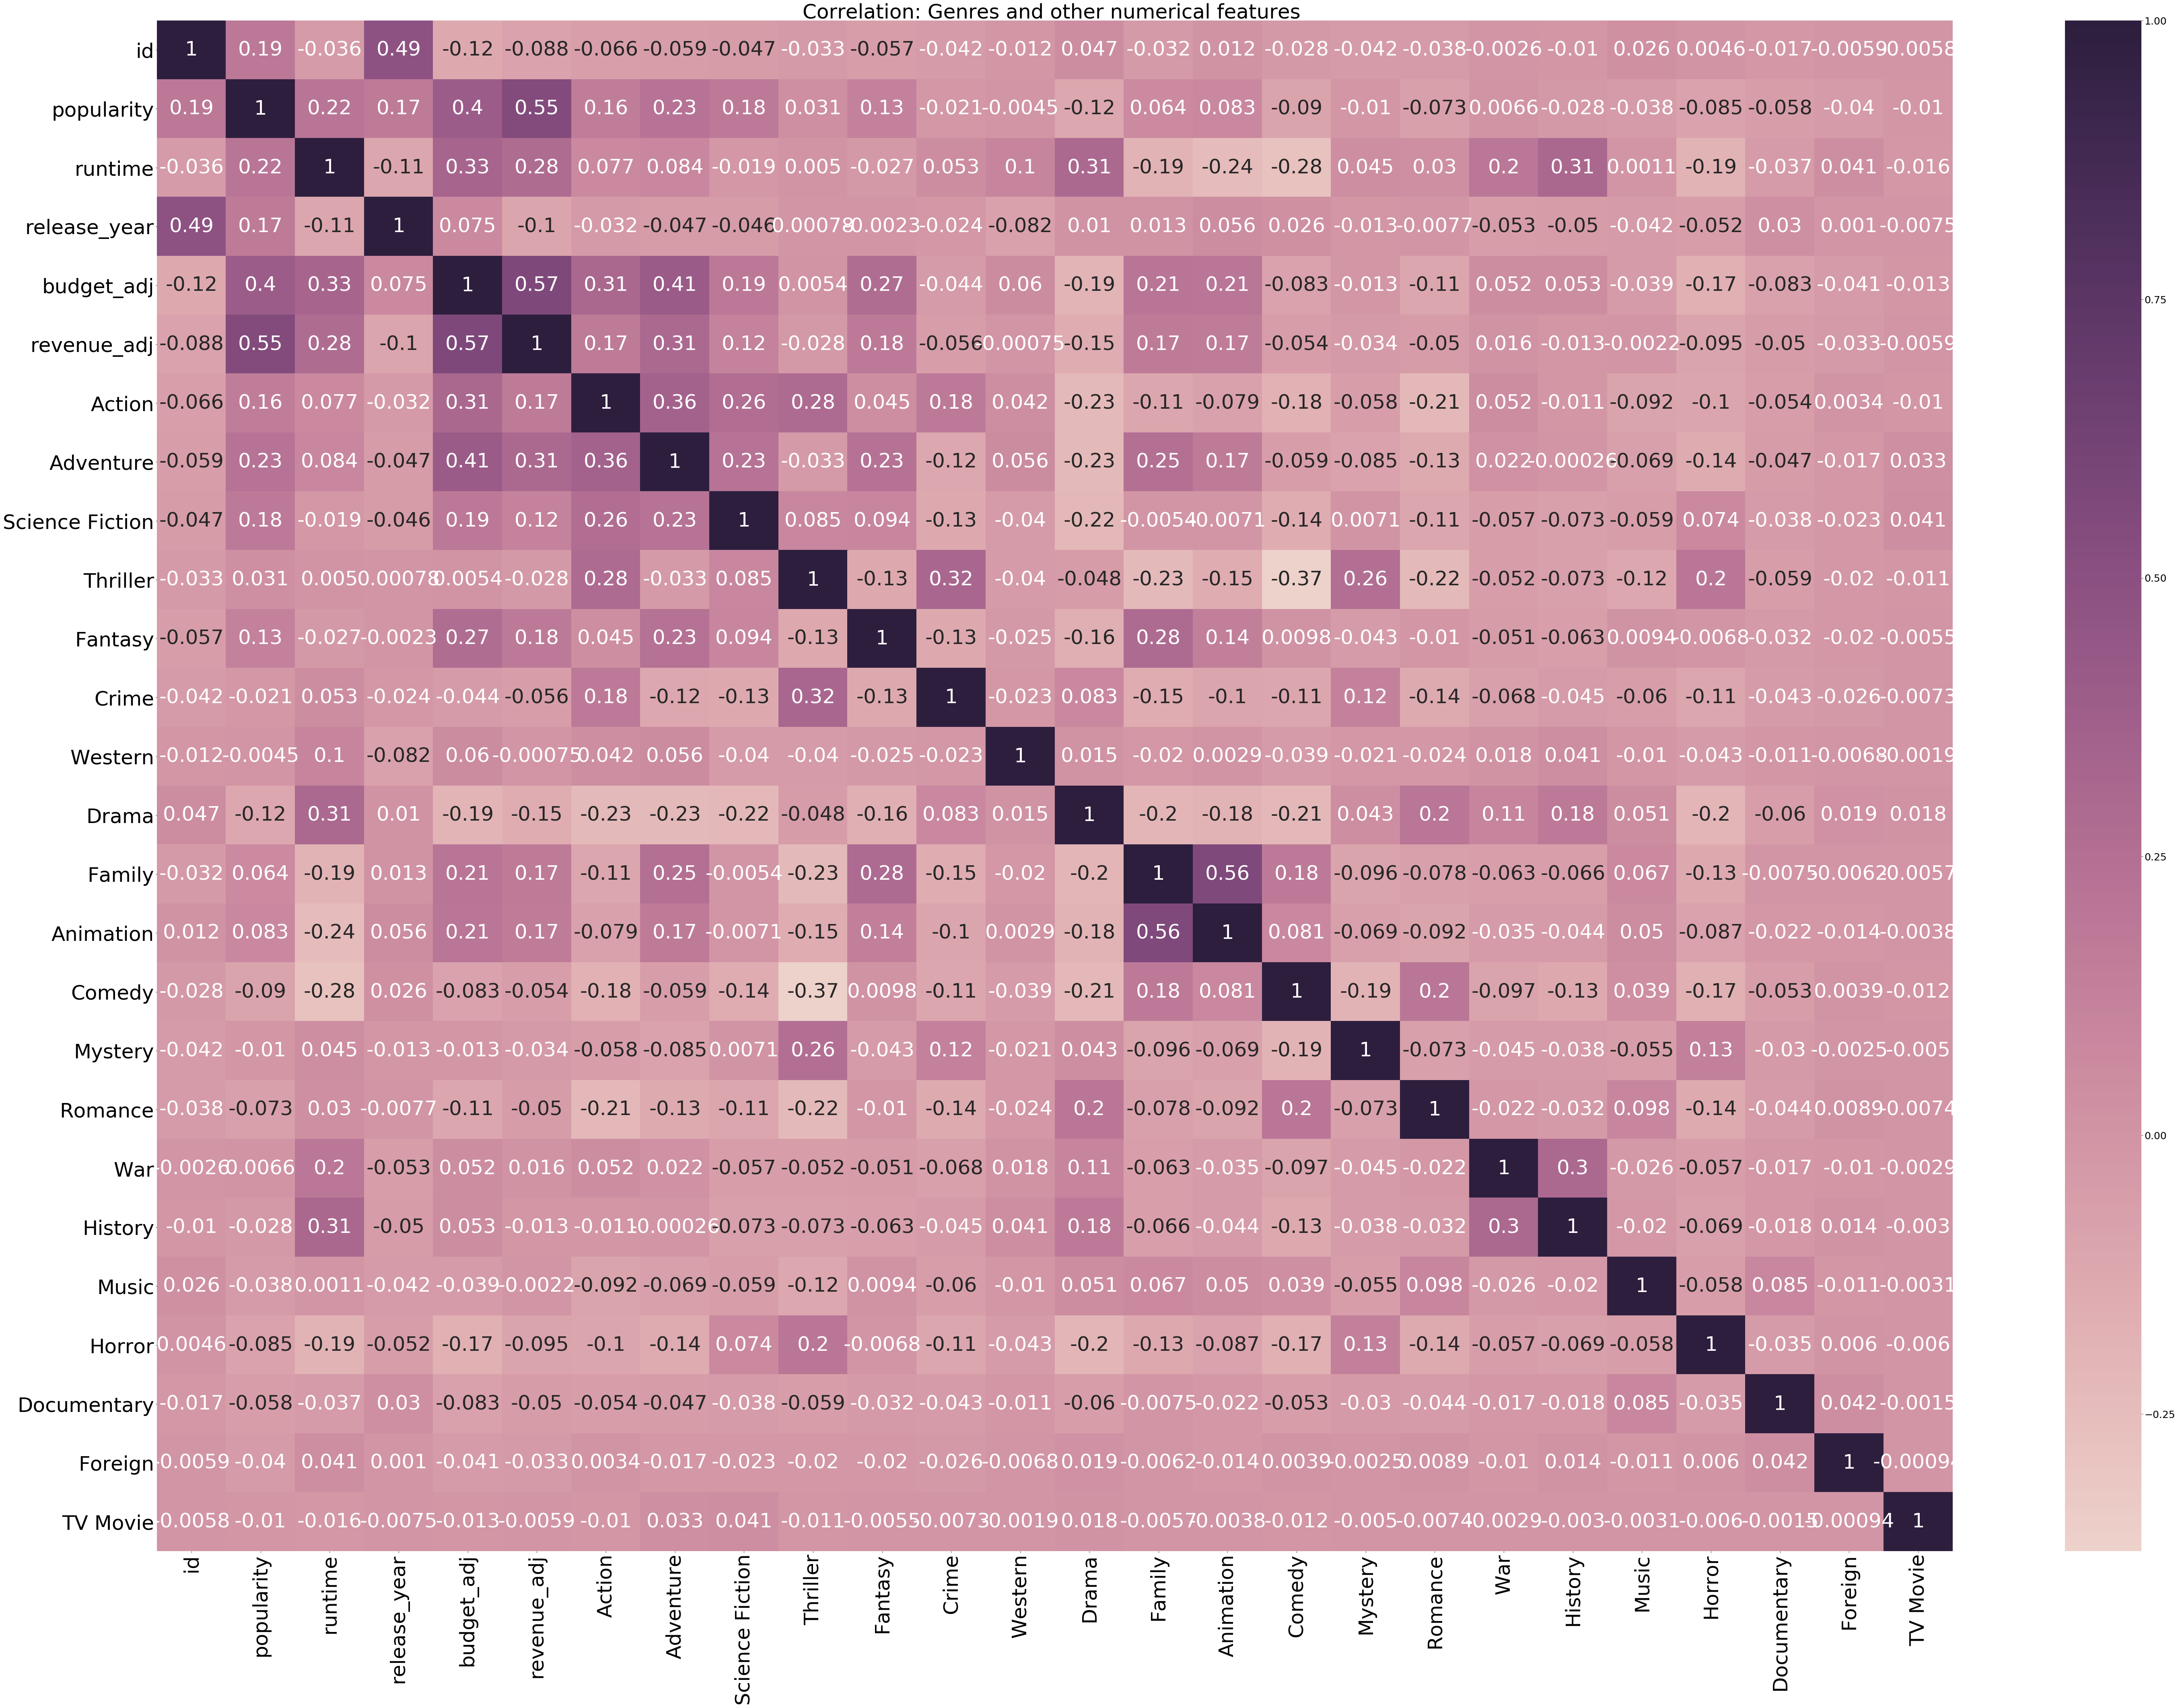

In [25]:
corr = data_genre.corr()
cmap = sns.cubehelix_palette(as_cmap=True)
plt.figure(figsize=(100,70))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,cmap=cmap,annot_kws={"size": 50})
plt.xticks(fontsize=50, rotation=90)
plt.yticks(fontsize=50, rotation=360)
plt.title("Correlation: Genres and other numerical features ",fontsize=50)

In [26]:
corr_coeffs = pd.DataFrame({'Corr_coeff':corr.abs().unstack().sort_values(ascending=False)})
corr_coeffs[(corr_coeffs['Corr_coeff']<1) & (corr_coeffs['Corr_coeff']>=  0.5)]

Corr_coeff
revenue_adj budget_adj     0.570451
budget_adj  revenue_adj    0.570451
Animation   Family         0.561968
Family      Animation      0.561968
popularity  revenue_adj    0.546959
revenue_adj popularity     0.546959

* <font color=blue> There is a positive correlation between budget and revenue, popularity and revenue, popularity and budget. Family and Animation Genres are also correlated. However, there is no correlation between any of the Genres and popularity or revenue.  </font> 

### Other Non-numeric features

#### <font color=coral>(Question#5)</font> Which Cast, directors, keywords, and production companies have the highest numbers of movie release? 

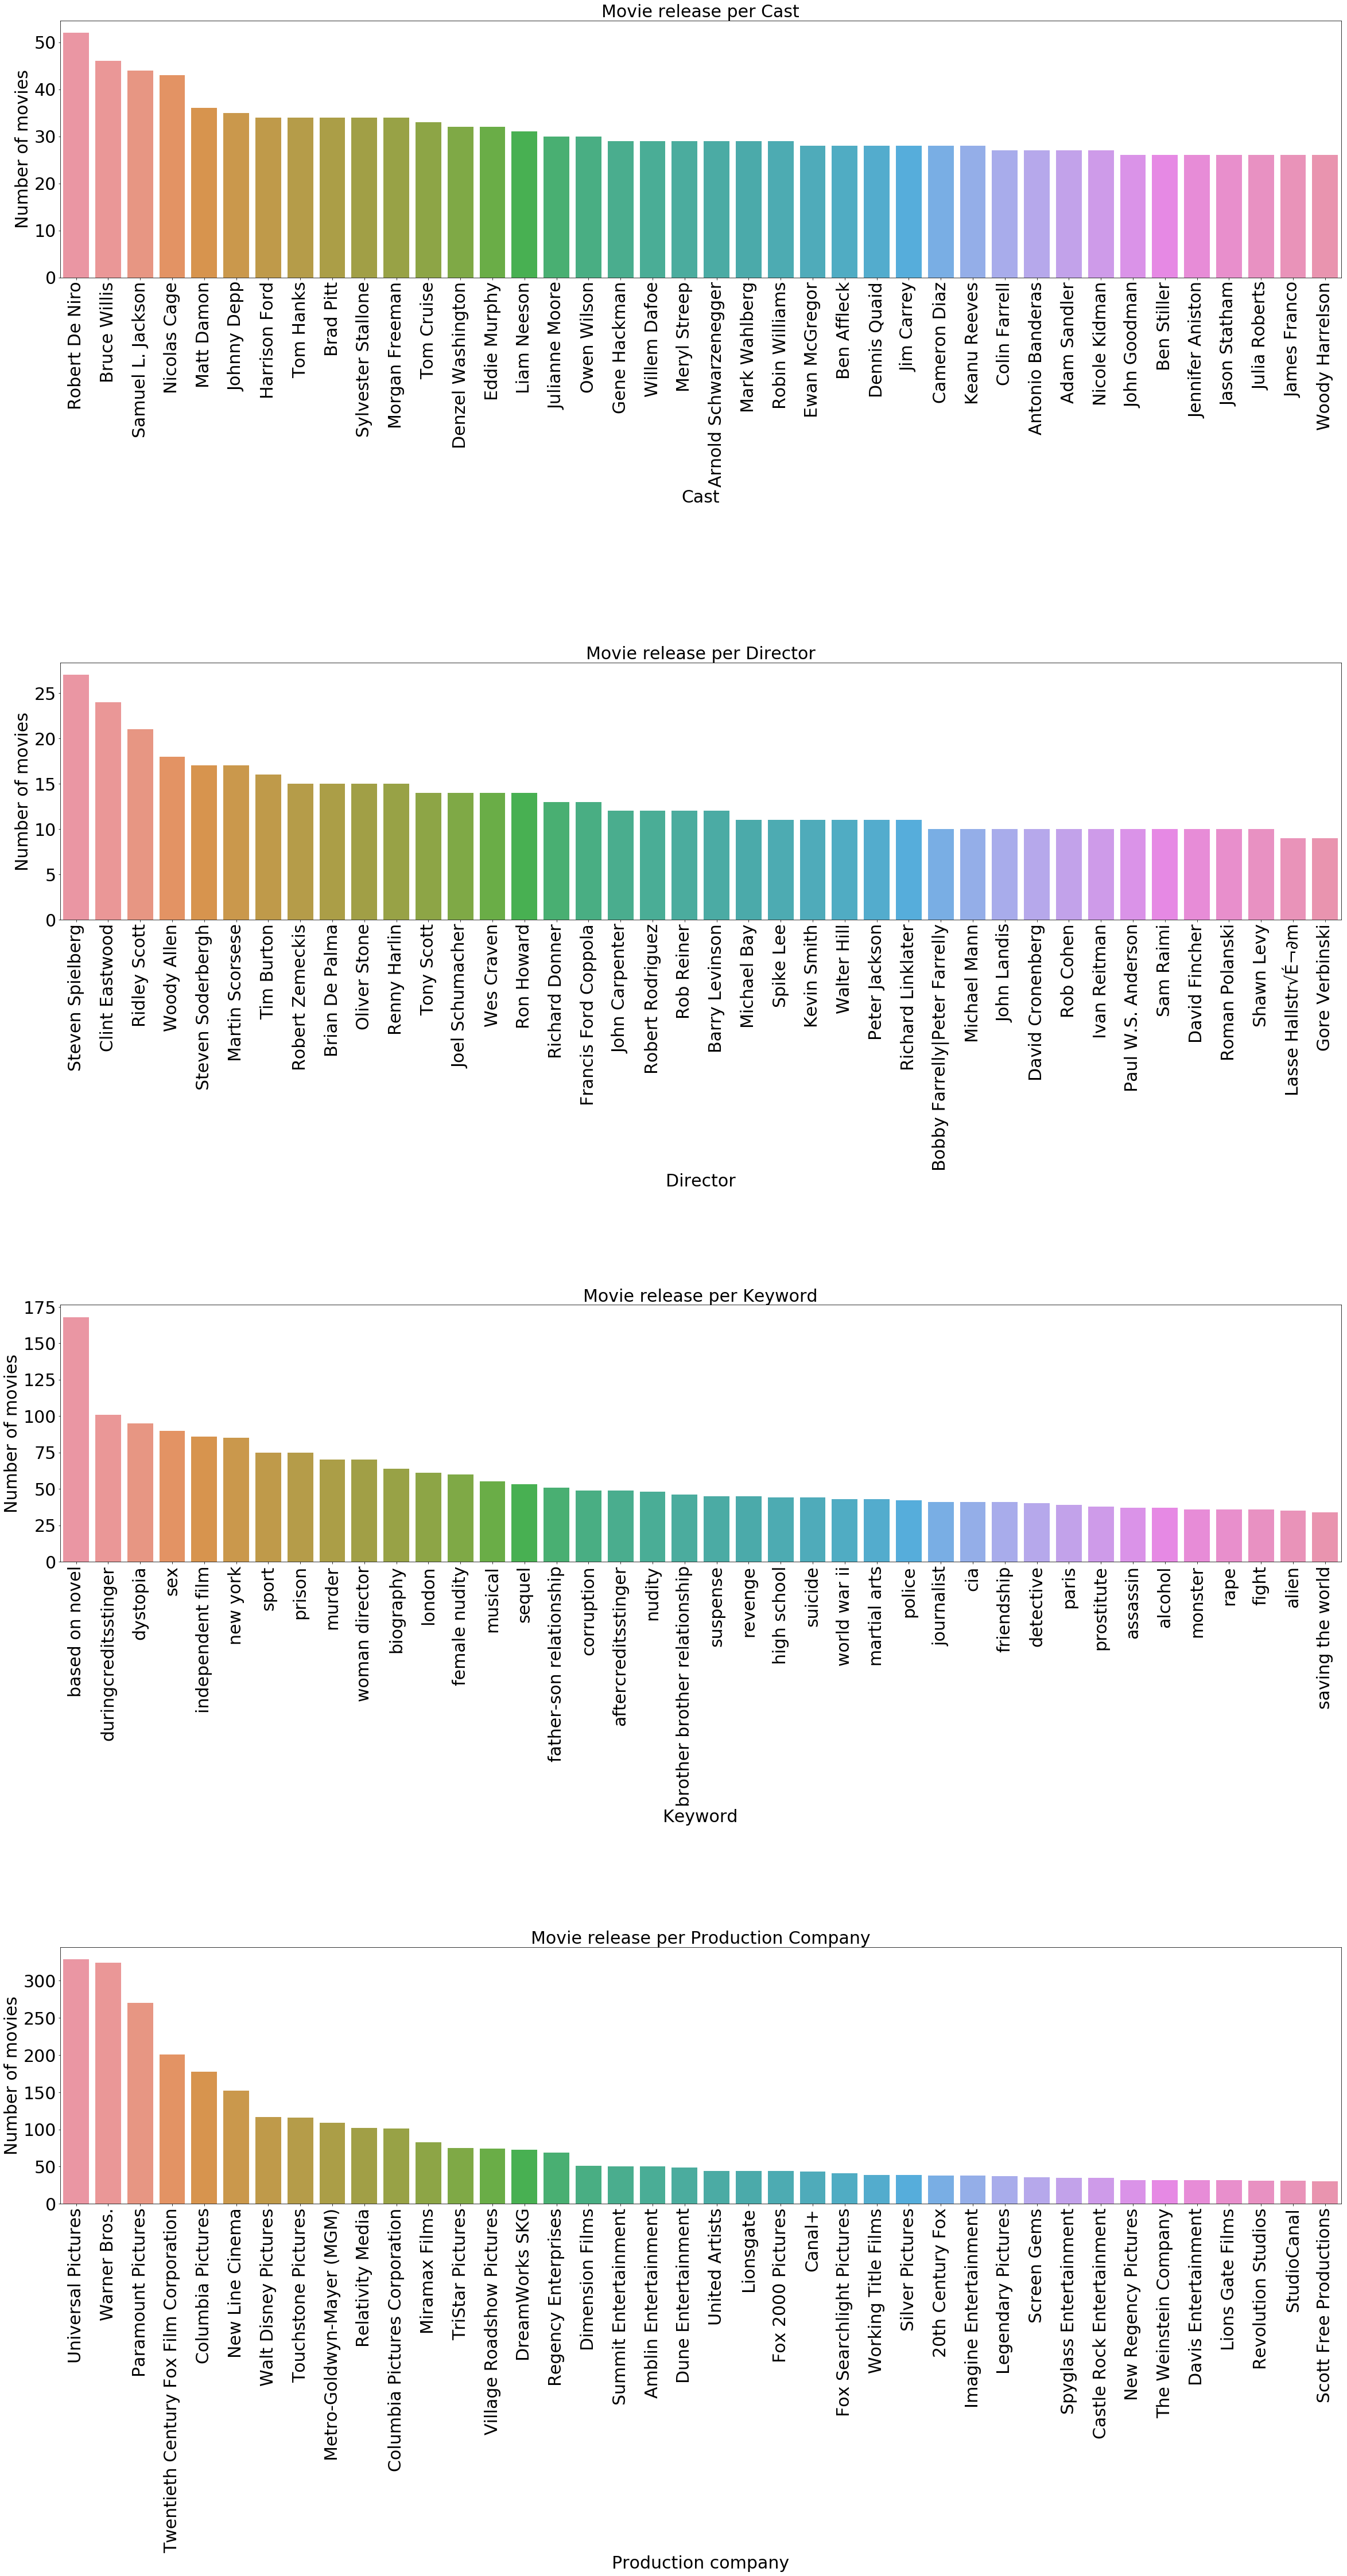

In [27]:
pyplot.figure(figsize=(40,70))

plt.subplot(4,1,1)
cast_Counts=cast_split.stack().value_counts().nlargest(40)
sns.barplot(x=cast_Counts.index, y=cast_Counts)
plt.ylabel("Number of movies",fontsize=30)
plt.xlabel("Genre",fontsize=30)
plt.title("Movie release per Cast",fontsize=30)
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30, rotation=360)
plt.xlabel("Cast",fontsize=30)

plt.subplot(4,1,2)
director_Counts=data['director'].value_counts().nlargest(40)
sns.barplot(x=director_Counts.index, y=director_Counts)
plt.ylabel("Number of movies",fontsize=30)
plt.title("Movie release per Director",fontsize=30)
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30, rotation=360)
plt.xlabel("Director",fontsize=30)

plt.subplot(4,1,3)
keywords_Counts=keywords_split.stack().value_counts().nlargest(40)
sns.barplot(x=keywords_Counts.index, y=keywords_Counts)
plt.ylabel("Number of movies",fontsize=30)
plt.title("Movie release per Keyword",fontsize=30)
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30, rotation=360)
plt.xlabel("Keyword",fontsize=30)

plt.subplot(4,1,4)
companies_Counts=companies_split.stack().value_counts().nlargest(40)
sns.barplot(x=companies_Counts.index, y=companies_Counts)
plt.ylabel("Number of movies",fontsize=30)
plt.title("Movie release per Production Company",fontsize=30)
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30, rotation=360)
plt.xlabel("Production company",fontsize=30)

plt.subplots_adjust(hspace=1.5)
plt.subplots_adjust(wspace=0.2)

plt.show()

* <font color=blue> The top 5, in term of number of movies produced, are summarized for each feature below </font> 

In [28]:
multi_table([ pd.DataFrame({'No. of Movies':cast_Counts.rename_axis('Cast').head()}), 
             pd.DataFrame({'No. of Movies':companies_Counts.rename_axis('Production company').head()}),
             pd.DataFrame({'No. of Movies':keywords_Counts.rename_axis('Keyword').head()}),
             pd.DataFrame({'No. of Movies':director_Counts.rename_axis('Director').head()})])

#### <font color=coral>(Question#6)</font> Which Cast, directors, keywords, and production companies have the highest average popularity or revenue?

#### Keywords

In [29]:
data.set_index(['keywords'], inplace=True)
kw_means_table = pd.DataFrame({'keyword':keywords_list})

#popularity
kw_mean_popularity = []
for kw in keywords_list:
    kw_mean_popularity.append(data.filter(like=kw, axis=0).popularity.mean())

kw_means_table['Mean_popularity'] = pd.Series(kw_mean_popularity)  

#revenue
kw_mean_revenue = []
for kw in keywords_list:
    kw_mean_revenue.append(data.filter(like=kw, axis=0).revenue_adj.mean())

kw_means_table['Mean_revenue'] = pd.Series(kw_mean_revenue)  

kw_means_table.head()

keyword  Mean_popularity  Mean_revenue
0            monster         1.912584  1.671669e+08
1                dna         2.336036  1.870924e+08
2  tyrannosaurus rex         5.954378  5.979768e+08
3       velociraptor        11.121115  7.192612e+08
4             island         2.147139  3.108403e+08

Text(0.5,1,'Mean Revenue per Keyword')

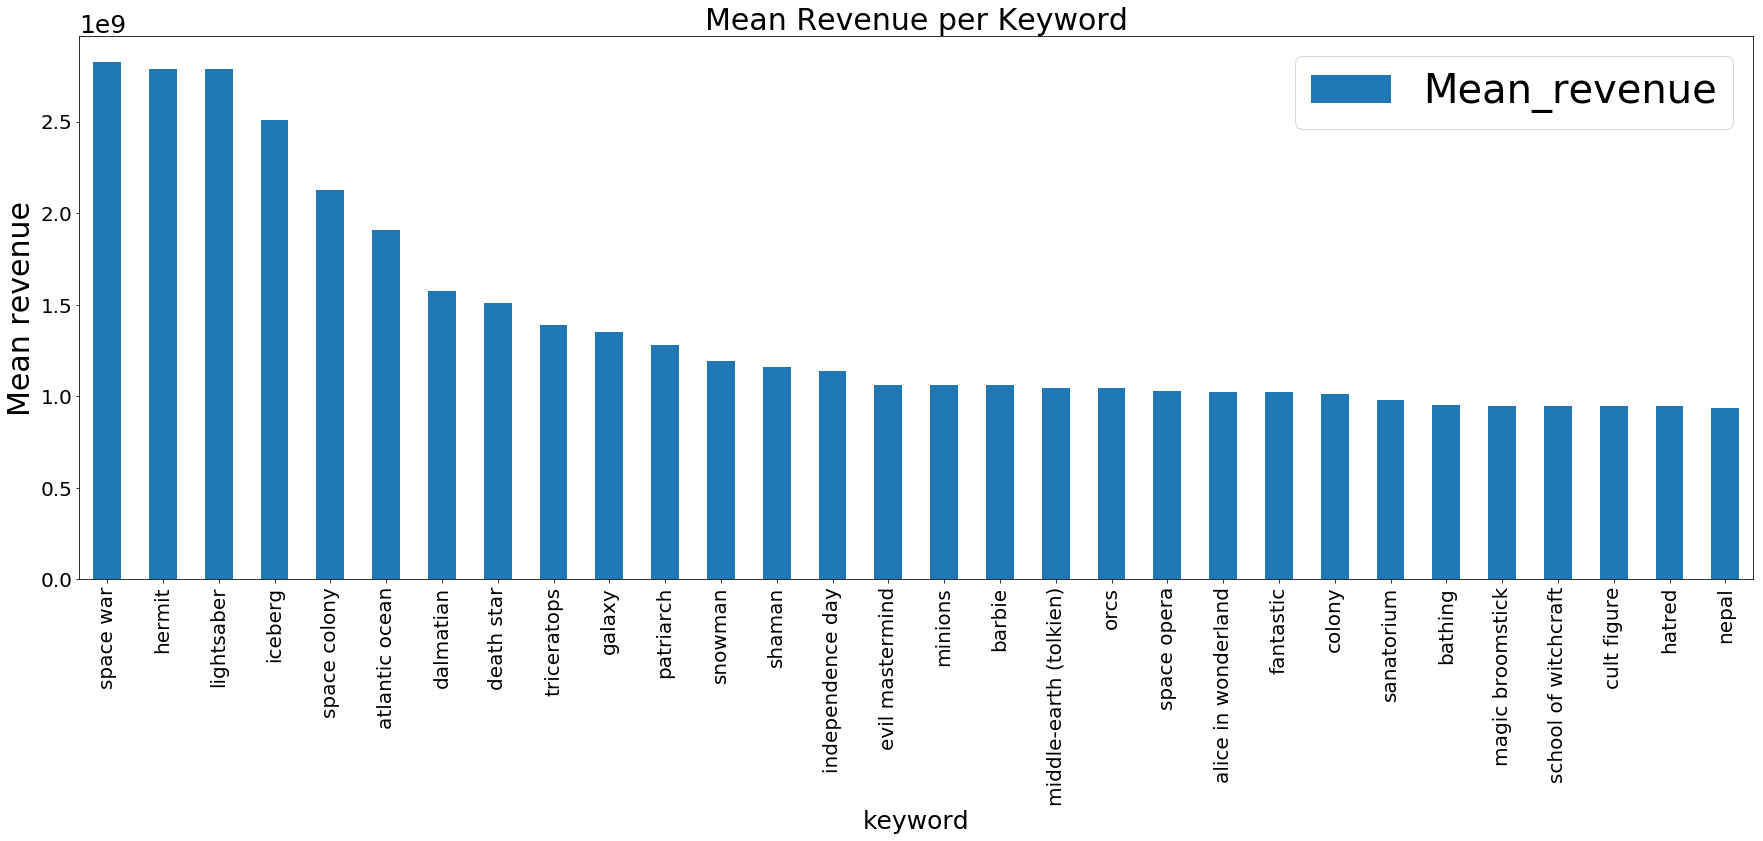

In [30]:
kw_means_table.set_index(['keyword'], inplace=True)
kw_means_table[['Mean_revenue']].sort_values('Mean_revenue', ascending=False)[:30].plot(kind='bar',figsize=(30,10),fontsize=20)
plt.ylabel("Mean revenue",fontsize=30)
plt.title("Mean Revenue per Keyword",fontsize=30)

Text(0,0.5,'Mean Popularity')

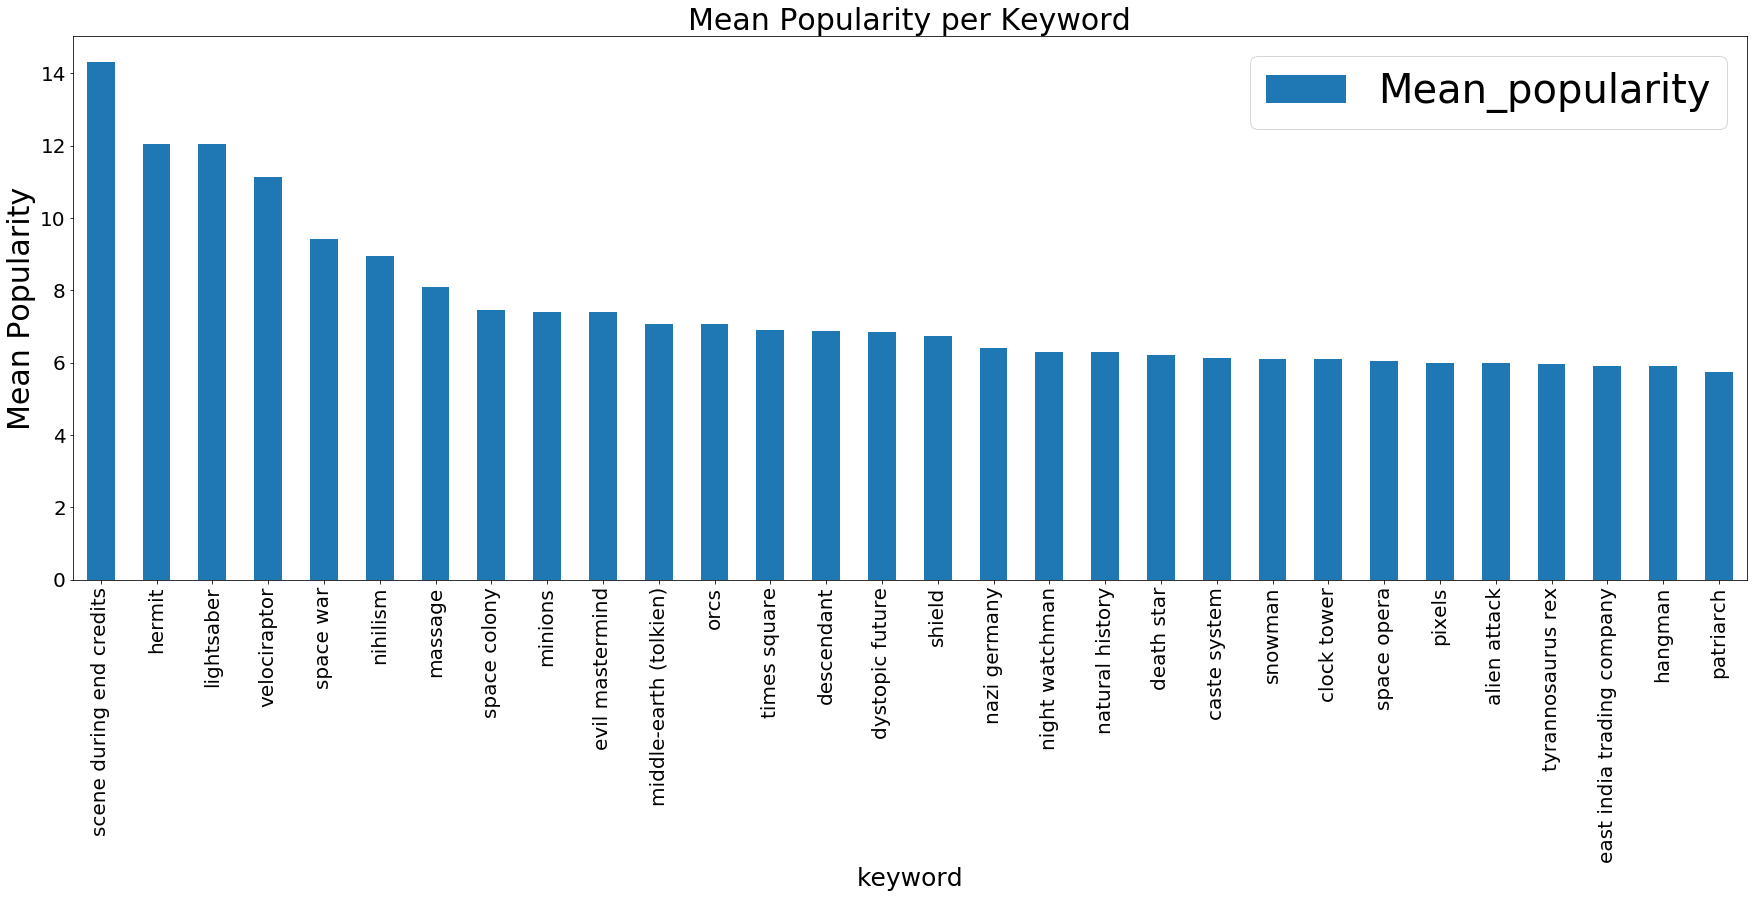

In [31]:
kw_means_table[['Mean_popularity']].sort_values('Mean_popularity', ascending=False)[:30].plot(kind='bar',figsize=(30,10),fontsize=20)
plt.title("Mean Popularity per Keyword",fontsize=30)
plt.ylabel("Mean Popularity",fontsize=30)

#### Cast

In [32]:
data.set_index(['cast'], inplace=True)
cast_means_table = pd.DataFrame({'cast':cast_list})

#popularity
cast_mean_popularity = []
for cast in cast_list:
    cast_mean_popularity.append(data.filter(like=cast, axis=0).popularity.mean())
cast_means_table['Mean_popularity'] = pd.Series(cast_mean_popularity)  

#Revenue
cast_mean_revenue = []
for cast in cast_list:
    cast_mean_revenue.append(data.filter(like=cast, axis=0).revenue_adj.mean())

cast_means_table['Mean_revenue'] = pd.Series(cast_mean_revenue) 

cast_means_table.head()

cast  Mean_popularity  Mean_revenue
0          Chris Pratt         6.816003  3.228559e+08
1  Bryce Dallas Howard         5.876791  3.329488e+08
2          Irrfan Khan         9.255885  5.031366e+08
3    Vincent D'Onofrio         3.849378  2.281238e+08
4        Nick Robinson        32.985763  1.392446e+09

Text(0.5,1,'Mean Revenue per Cast')

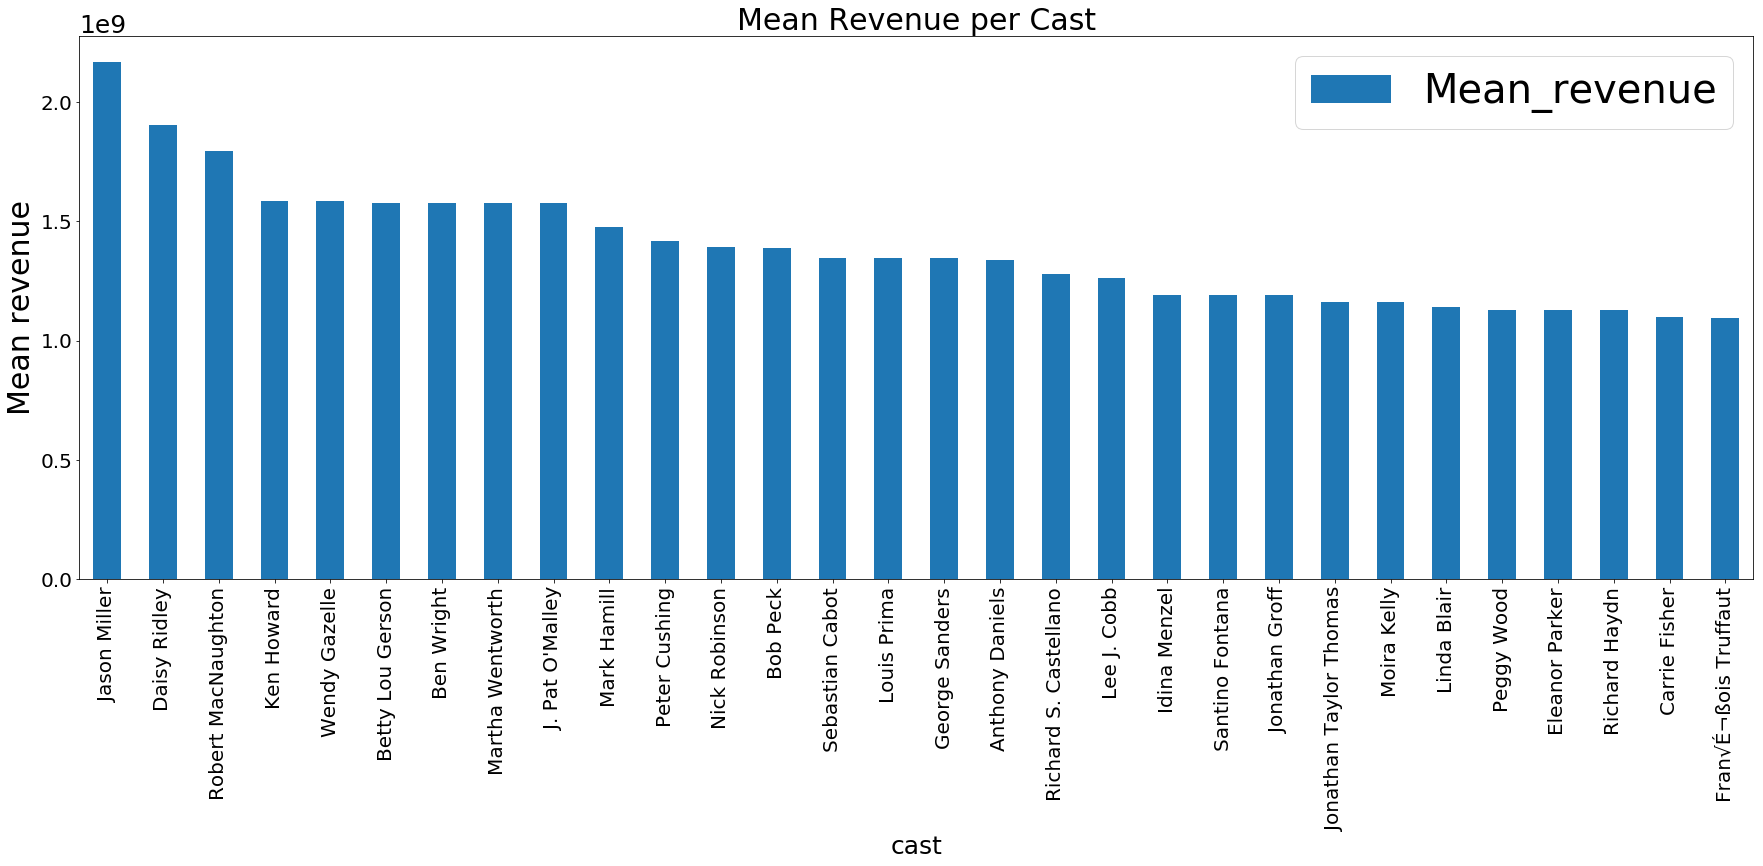

In [33]:
cast_means_table.set_index(['cast'], inplace=True)
cast_means_table[['Mean_revenue']].sort_values('Mean_revenue', ascending=False)[:30].plot(kind='bar',figsize=(30,10),fontsize=20)
plt.ylabel("Mean revenue",fontsize=30)
plt.title("Mean Revenue per Cast",fontsize=30)

Text(0,0.5,'Mean Popularity')

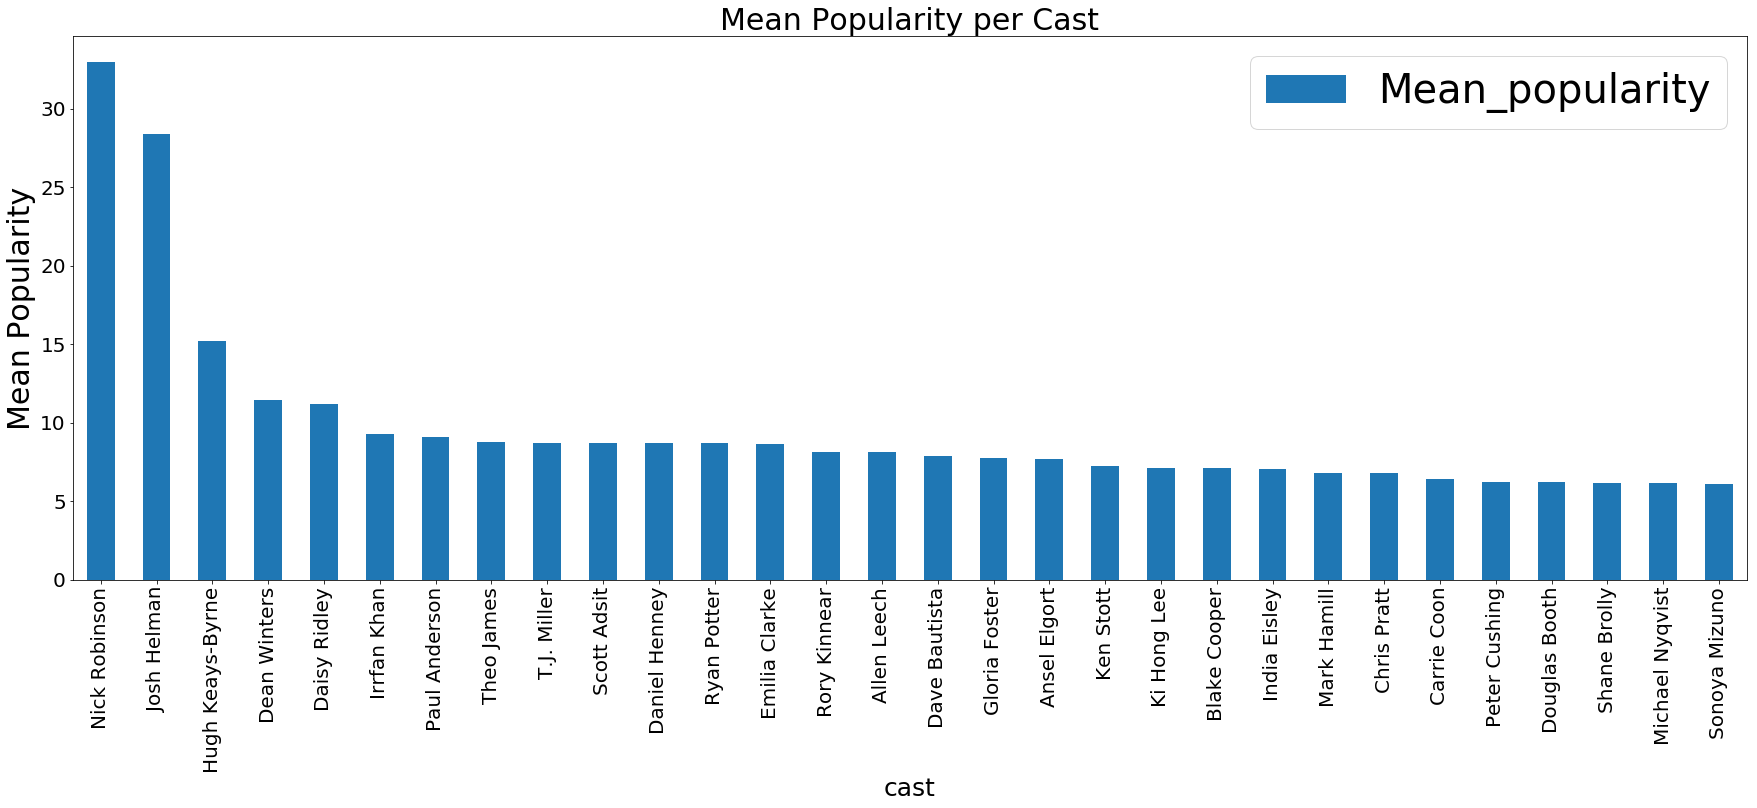

In [34]:
cast_means_table[['Mean_popularity']].sort_values('Mean_popularity', ascending=False)[:30].plot(kind='bar',figsize=(30,10),fontsize=20)
plt.title("Mean Popularity per Cast",fontsize=30)
plt.ylabel("Mean Popularity",fontsize=30)

#### Director

In [35]:
data.set_index(['director'], inplace=True)
director_means_table = pd.DataFrame({'director':director_list})

#popularity
director_mean_popularity = []
for director in director_list:
    director_mean_popularity.append(data.filter(like=director, axis=0).popularity.mean())
director_means_table['Mean_popularity'] = pd.Series(director_mean_popularity)  

#revenue
director_mean_revenue = []
for director in director_list:
    director_mean_revenue.append(data.filter(like=director, axis=0).revenue_adj.mean())
director_means_table['Mean_revenue'] = pd.Series(director_mean_revenue)  
   
director_means_table.head()

director  Mean_popularity  Mean_revenue
0   Colin Trevorrow        16.696886  6.981261e+08
1     George Miller         4.601337  1.874426e+08
2  Robert Schwentke         3.641644  1.506610e+08
3       J.J. Abrams         4.800957  6.829354e+08
4         James Wan         2.707129  3.235990e+08

Text(0.5,1,'Mean Revenue per Director')

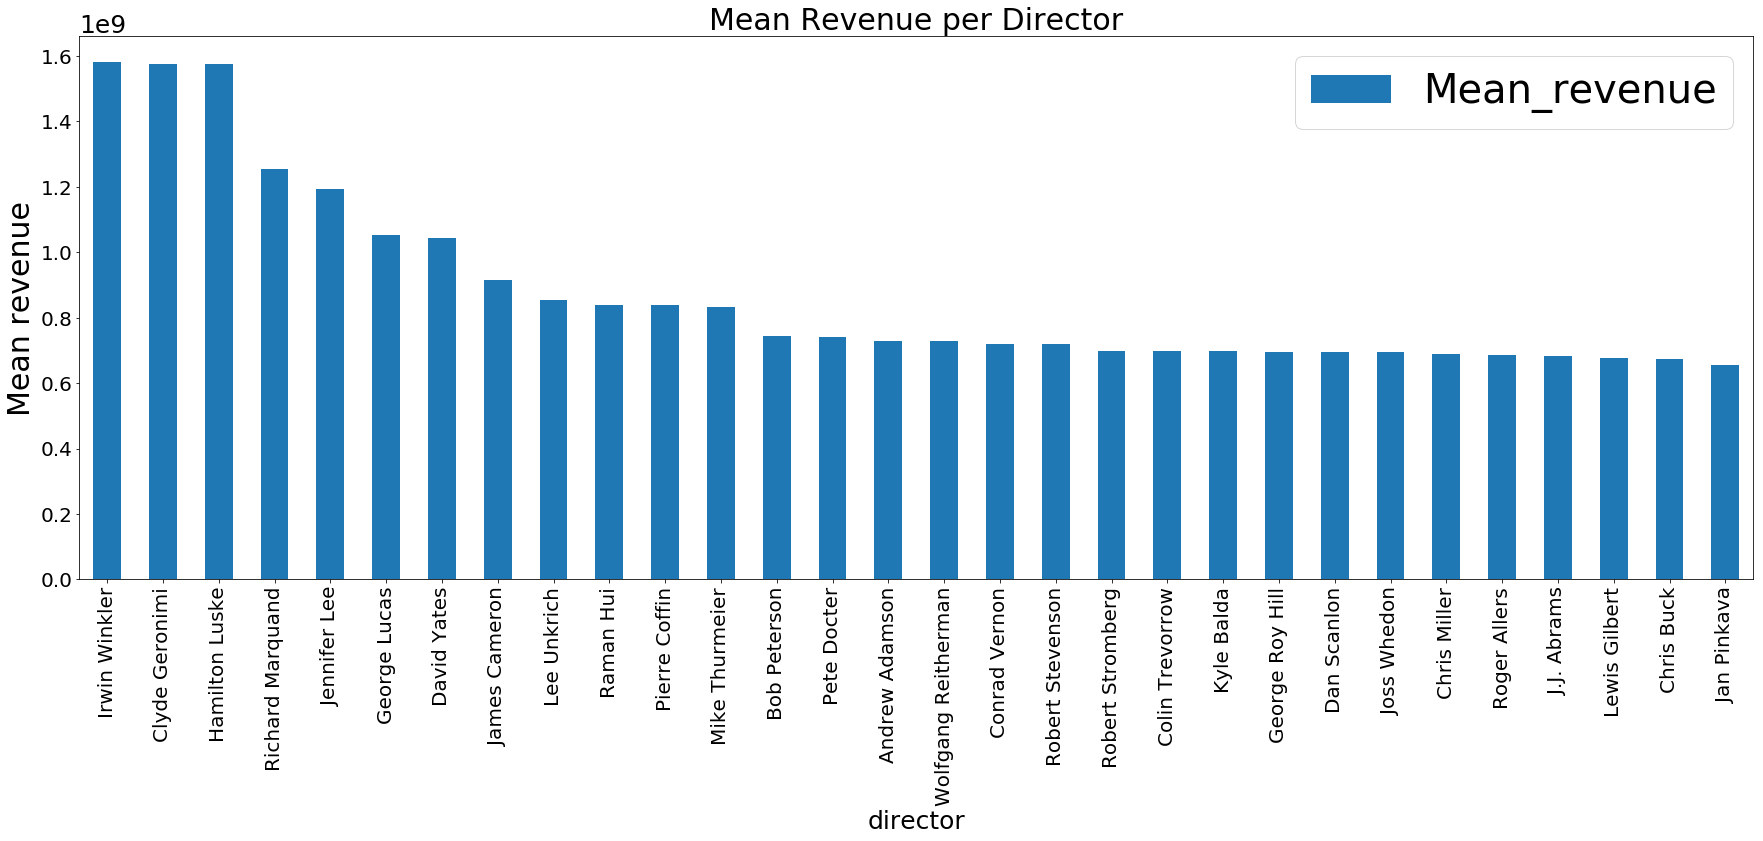

In [36]:
director_means_table.set_index(['director'], inplace=True)
director_means_table[['Mean_revenue']].sort_values('Mean_revenue', ascending=False)[:30].plot(kind='bar', figsize=(30,10),fontsize=20)
plt.ylabel("Mean revenue",fontsize=30)
plt.title("Mean Revenue per Director",fontsize=30)

Text(0,0.5,'Mean Popularity')

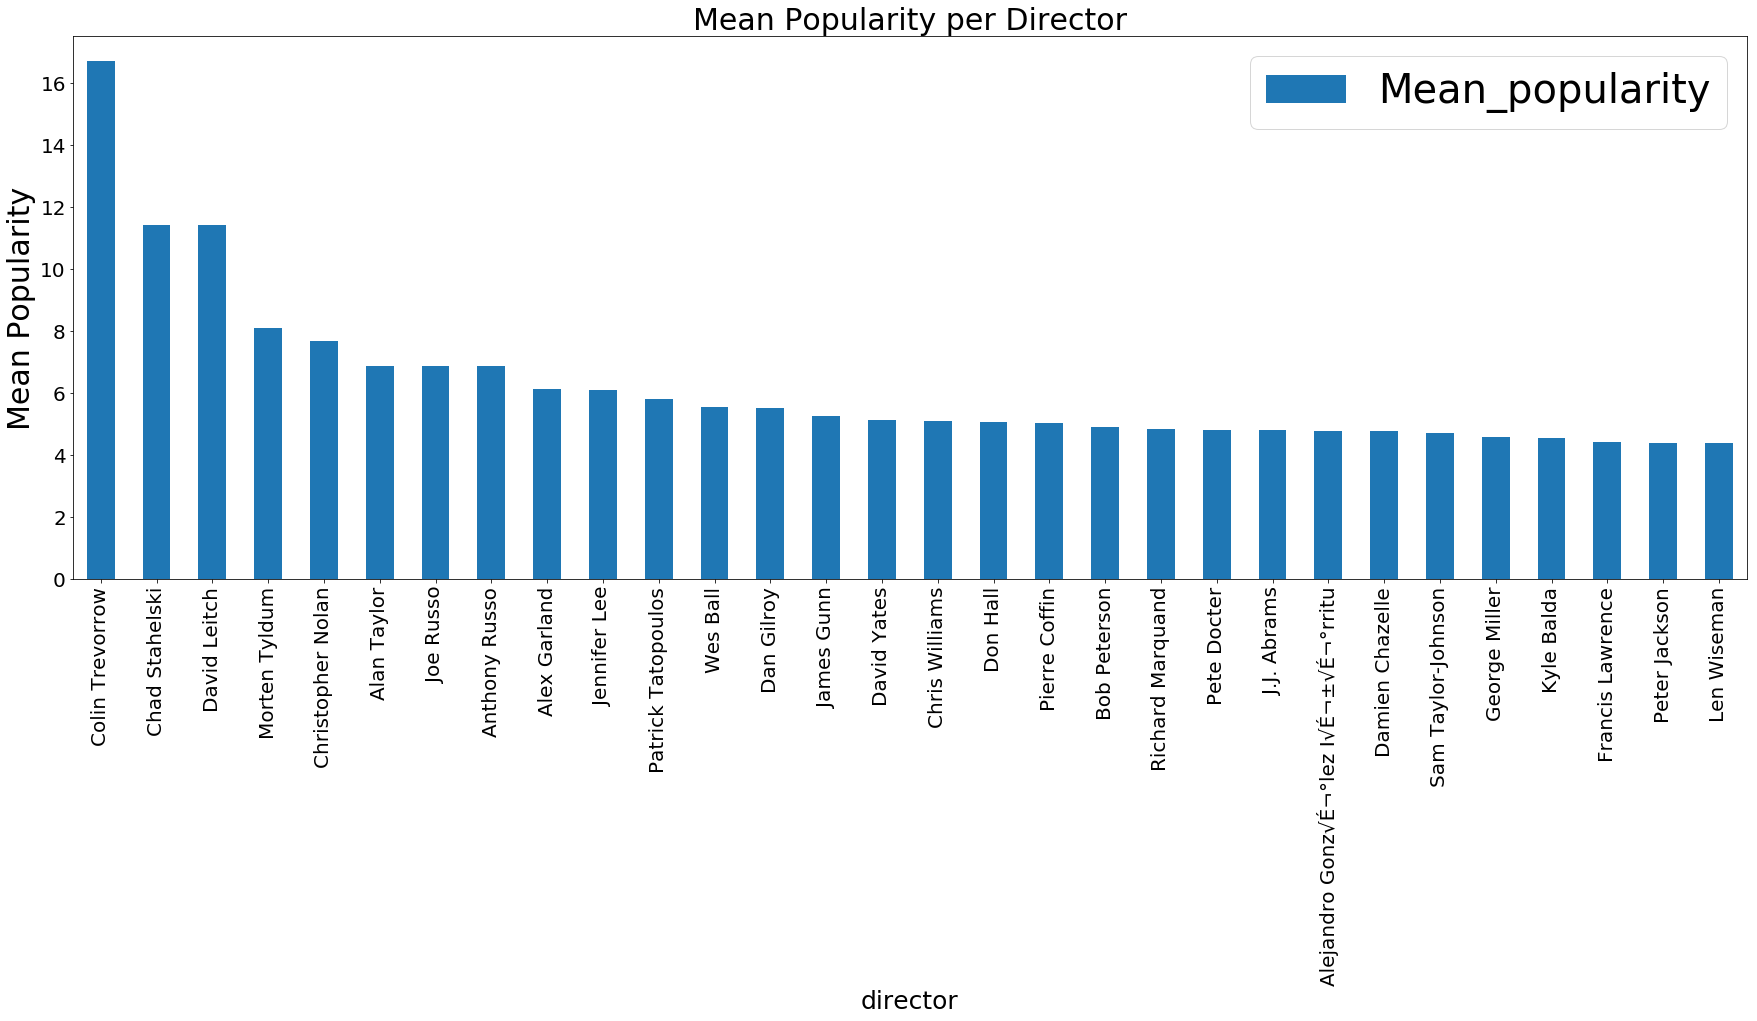

In [37]:
director_means_table[['Mean_popularity']].sort_values('Mean_popularity', ascending=False)[:30].plot(kind='bar',figsize=(30,10),fontsize=20)
plt.title("Mean Popularity per Director",fontsize=30)
plt.ylabel("Mean Popularity",fontsize=30)

#### Production companies

In [38]:
data.set_index(['production_companies'], inplace=True)
company_means_table = pd.DataFrame({'production_companies':companies_list})

#popularity
company_mean_popularity = []
for company in companies_list:
    company_mean_popularity.append(data.filter(like=company, axis=0).popularity.mean())
company_means_table['Mean_popularity'] = pd.Series(company_mean_popularity)

#revenue
company_mean_revenue = []
for company in companies_list:
    company_mean_revenue.append(data.filter(like=company, axis=0).revenue_adj.mean())
company_means_table['Mean_revenue'] = pd.Series(company_mean_revenue)  

company_means_table.head()

production_companies  Mean_popularity  Mean_revenue
0        Universal Studios         5.059040  2.691960e+08
1     Amblin Entertainment         2.314666  4.115187e+08
2       Legendary Pictures         4.152934  3.175639e+08
3  Fuji Television Network        12.777401  5.735000e+08
4                   Dentsu         4.613173  4.060538e+08

Text(0.5,1,'Mean Revenue per Production company')

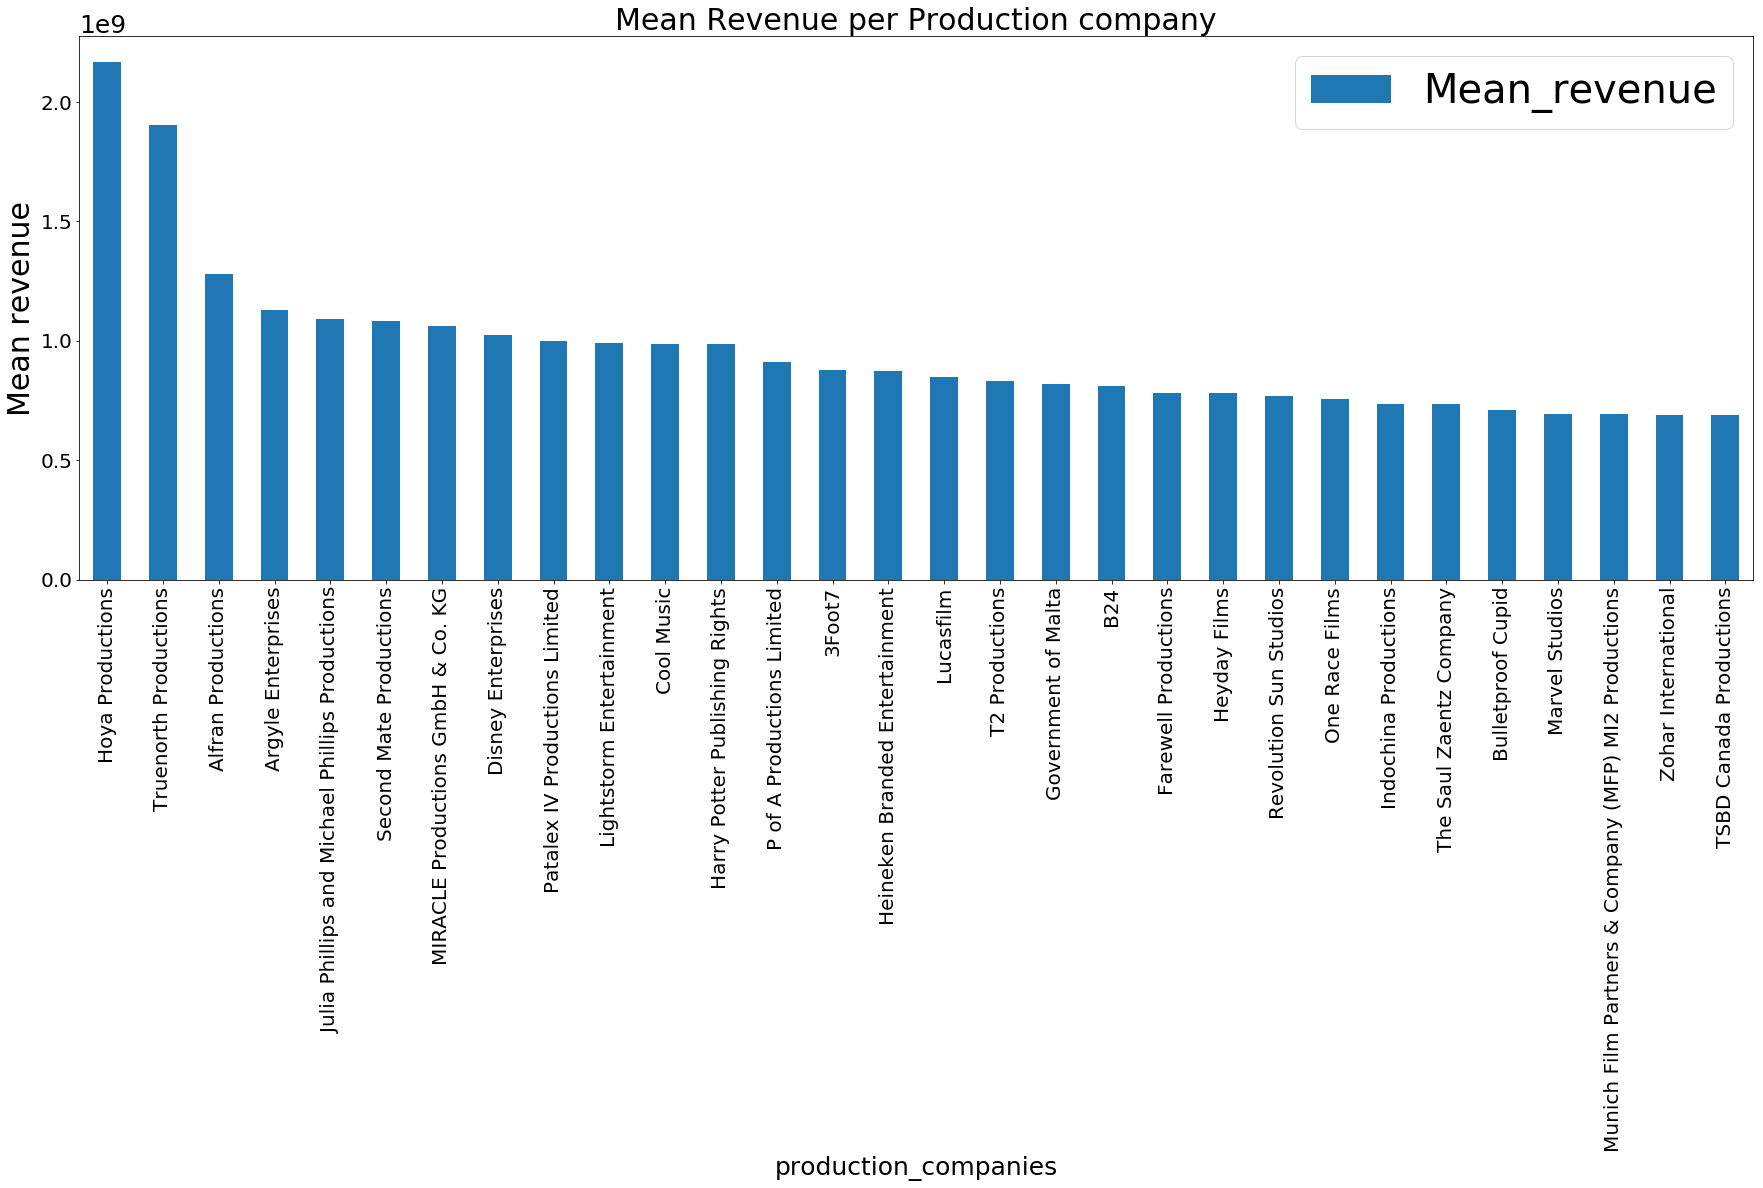

In [39]:
company_means_table.set_index(['production_companies'], inplace=True)
company_means_table[['Mean_revenue']].sort_values('Mean_revenue', ascending=False)[:30].plot(kind='bar',figsize=(30,10),fontsize=20)
plt.ylabel("Mean revenue",fontsize=30)
plt.title("Mean Revenue per Production company",fontsize=30)

Text(0,0.5,'Mean Popularity')

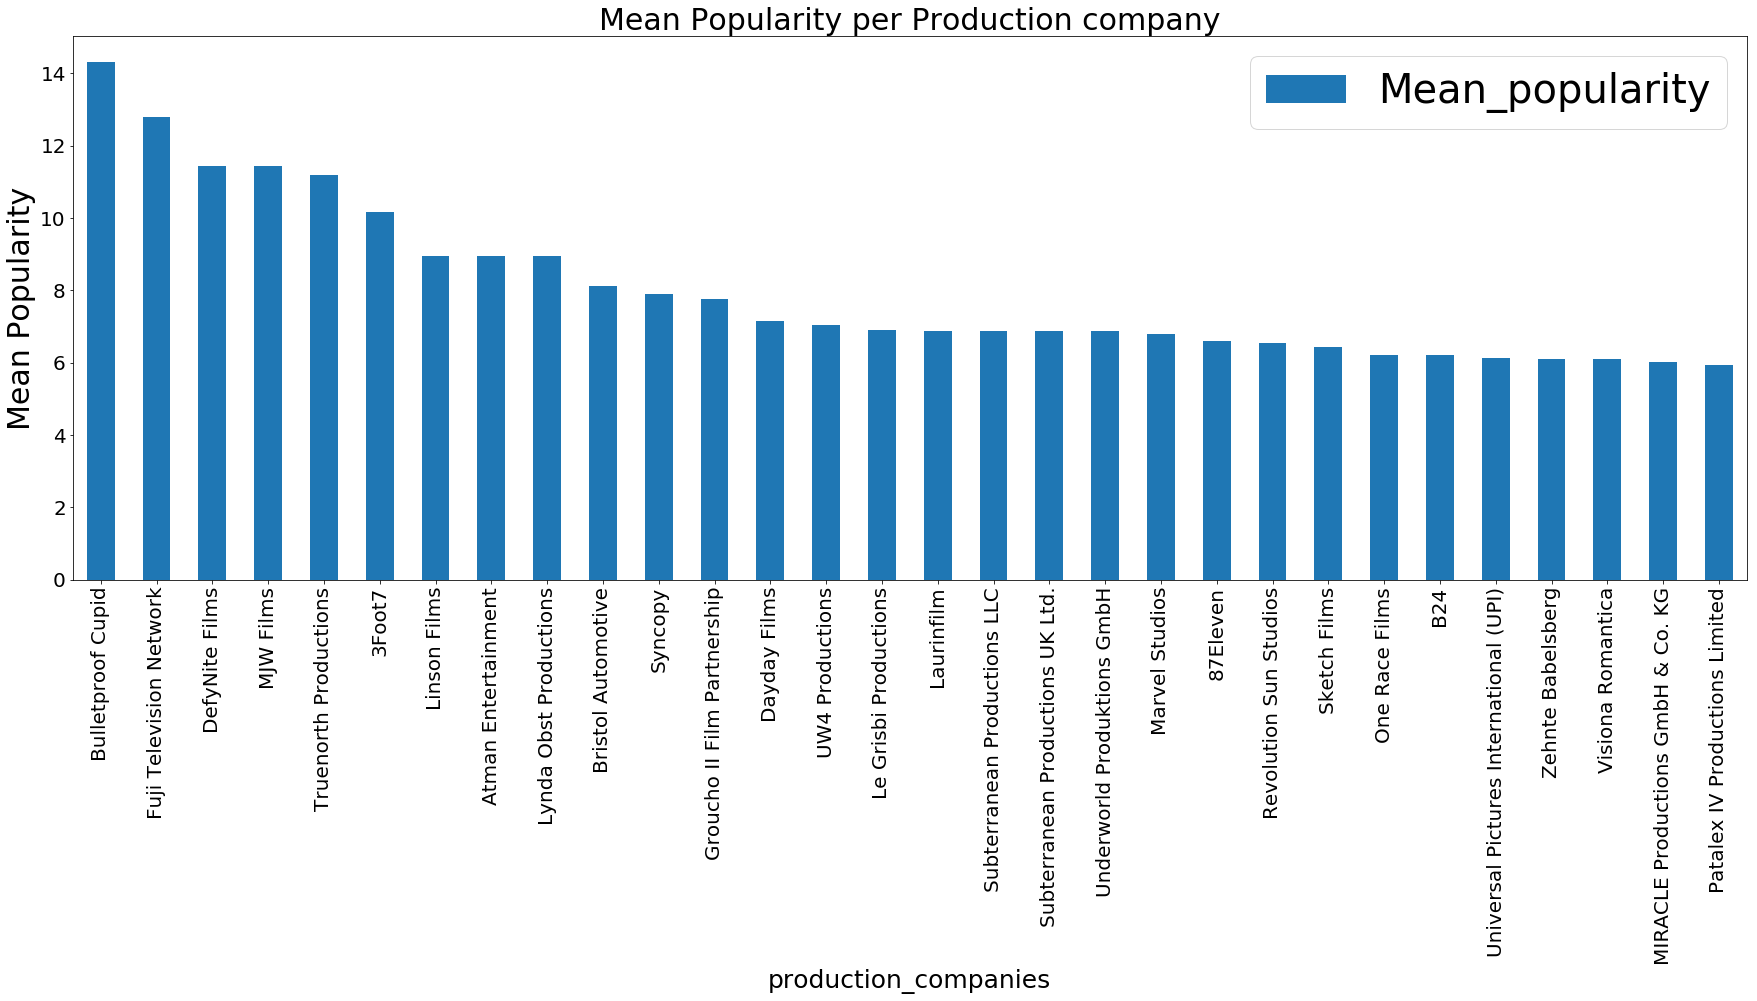

In [40]:
company_means_table[['Mean_popularity']].sort_values('Mean_popularity', ascending=False)[:30].plot(kind='bar',figsize=(30,10),fontsize=20)
plt.title("Mean Popularity per Production company",fontsize=30)
plt.ylabel("Mean Popularity",fontsize=30)

## Numerical futures 

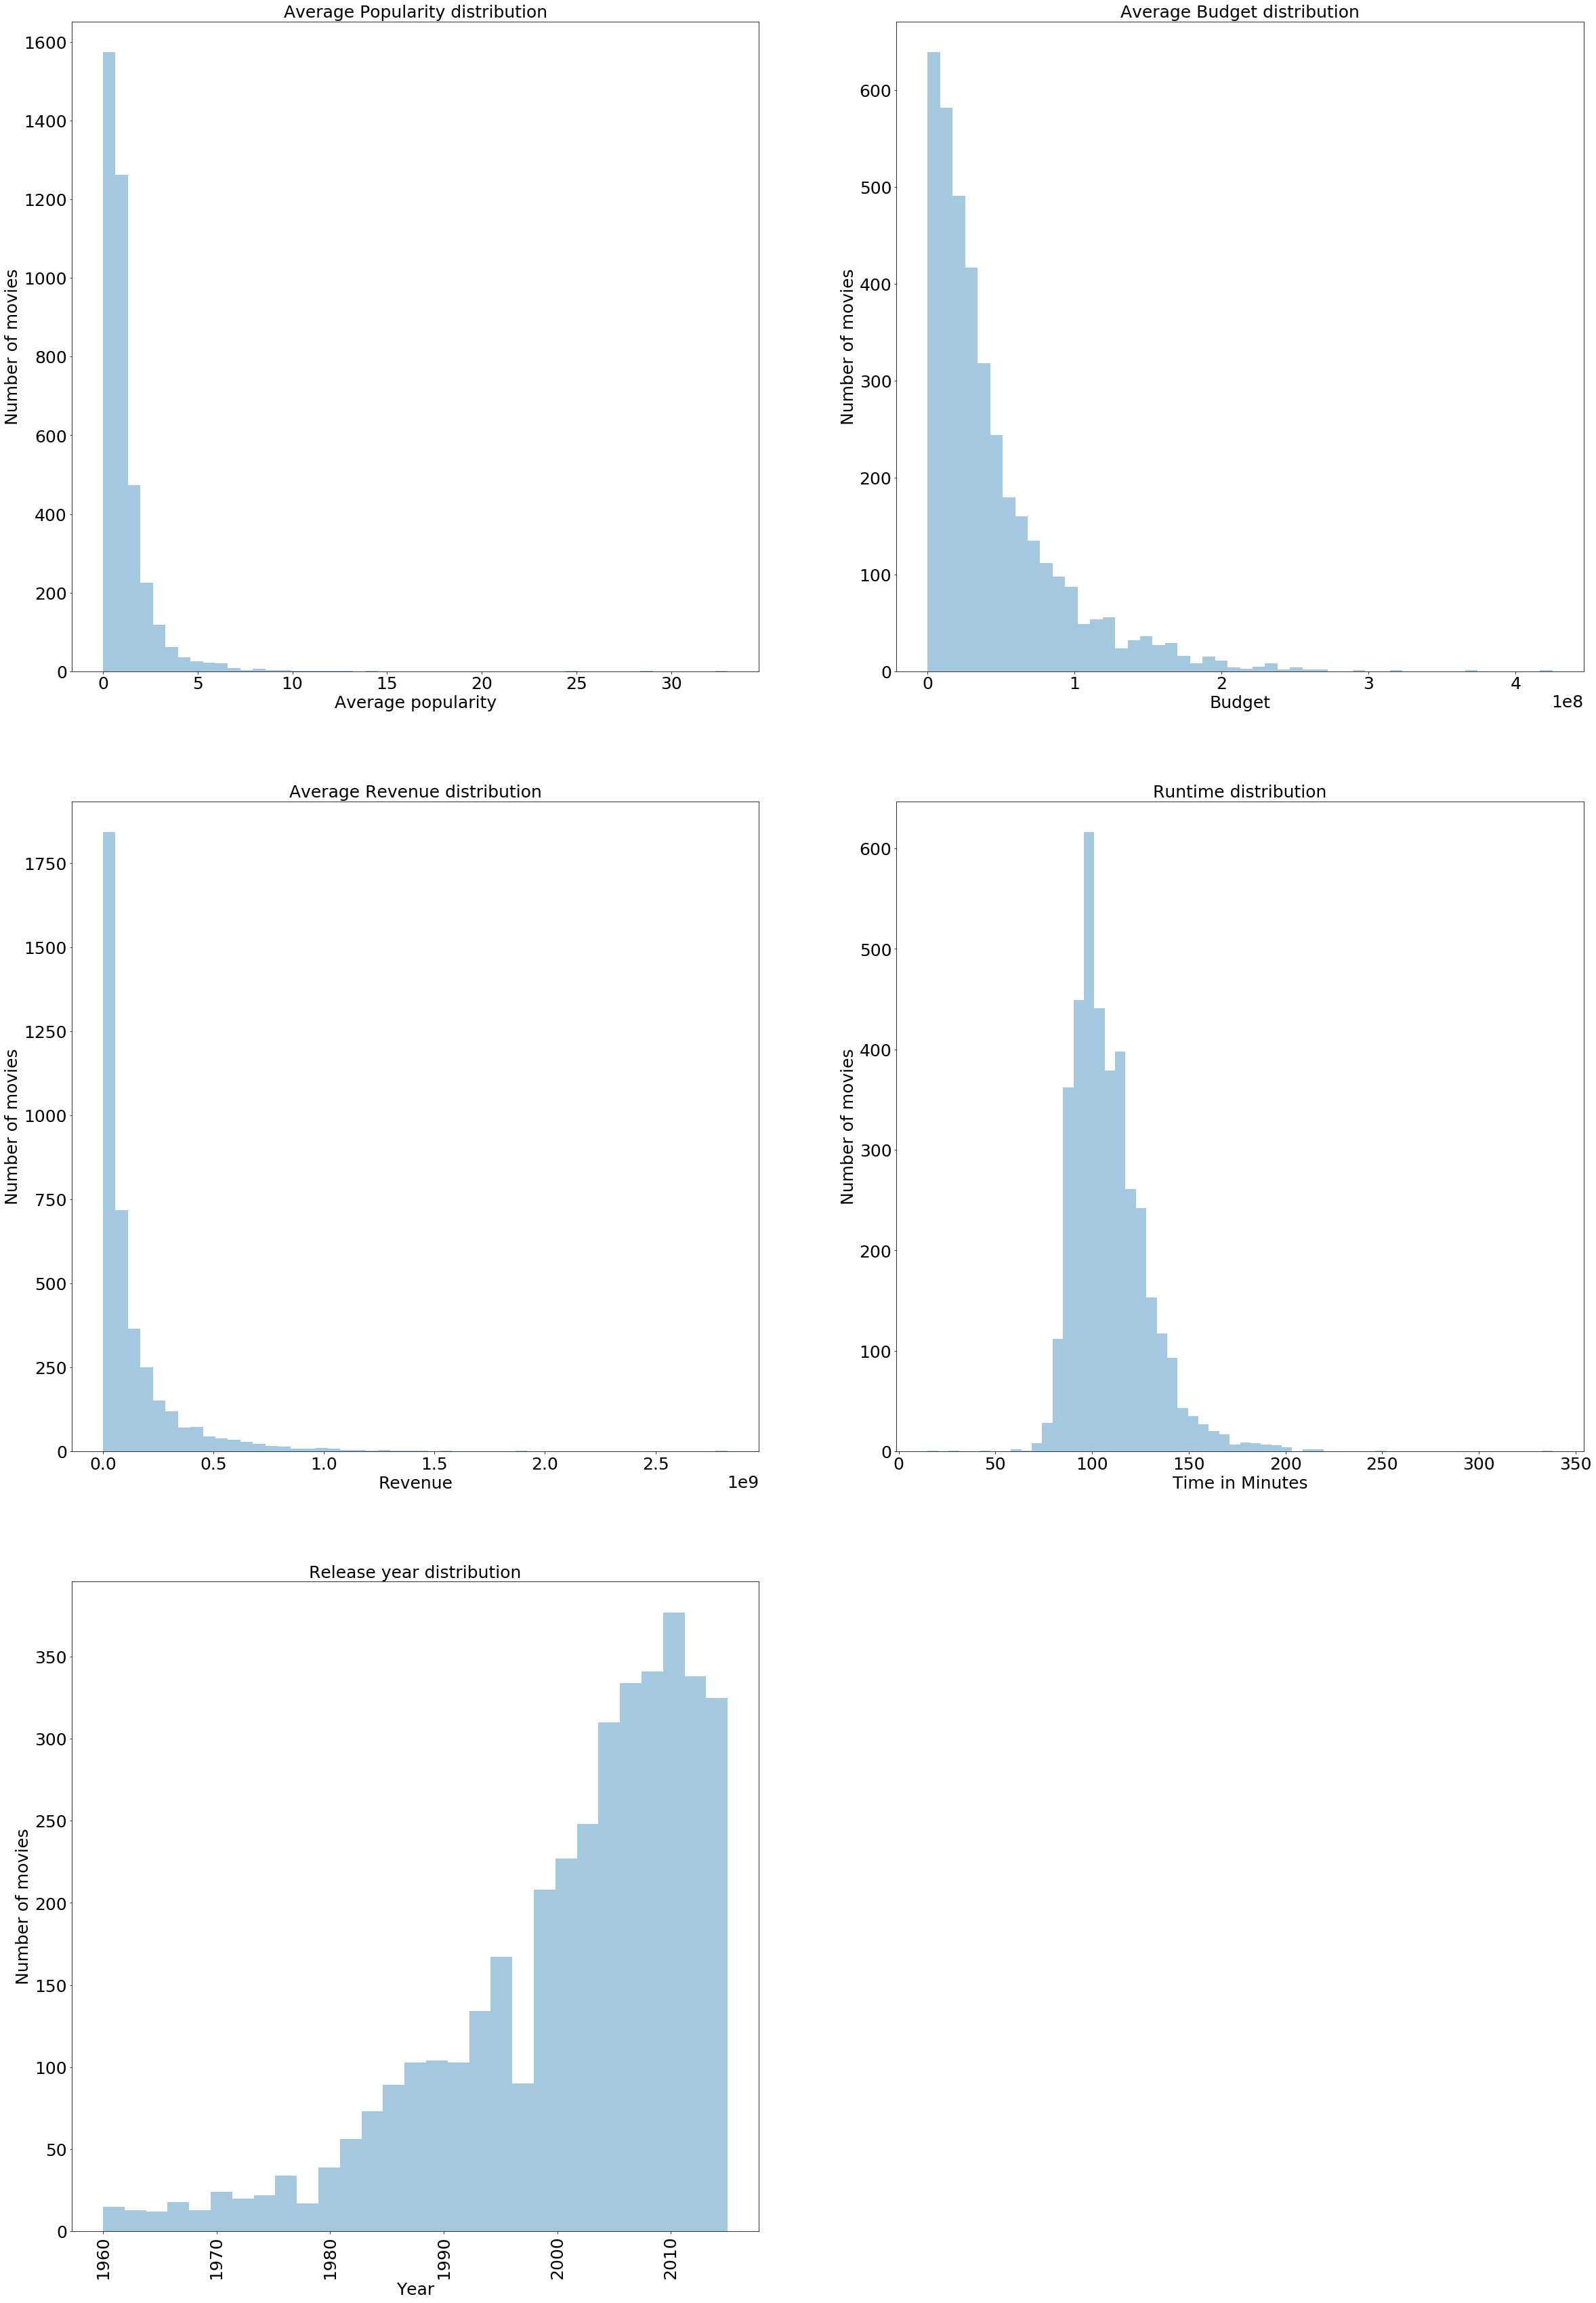

In [41]:
df= data[['popularity','budget_adj','revenue_adj','runtime','release_year']]

pyplot.figure(figsize=(40,60))

plt.subplot(3,2,1)
sns.distplot(df[['popularity']], kde=False, norm_hist=False)
plt.ylabel("Number of movies")
plt.xlabel("Average popularity")
plt.title("Average Popularity distribution")

plt.subplot(3,2,2)
sns.distplot(df[['budget_adj']], kde=False, norm_hist=False)
plt.ylabel("Number of movies")
plt.xlabel("Budget")
plt.title("Average Budget distribution")

plt.subplot(3,2,3)
sns.distplot(df[['revenue_adj']], kde=False, norm_hist=False)
plt.ylabel("Number of movies")
plt.xlabel("Revenue")
plt.title("Average Revenue distribution")

plt.subplot(3,2,4)
sns.distplot(df[['runtime']],bins=60, kde=False, norm_hist=False)
plt.ylabel("Number of movies")
plt.xlabel("Time in Minutes")
plt.title("Runtime distribution")

plt.subplot(3,2,5)
sns.distplot(df[['release_year']], kde=False, norm_hist=False)
plt.ylabel("Number of movies")
plt.xlabel("Year")
plt.title("Release year distribution")
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0.2)

rc={'axes.labelsize': 20, 'font.size': 20, 'legend.fontsize': 20, 'axes.titlesize': 20}
plt.rcParams.update(**rc)

plt.show()

* <font color=blue> The revenue, budget, and popularity distributions are right-skewed. This indicates that the data are concentrated within narrow ranges of values on the left except for larger outliers. 
  </font> 

<br>
* <font color=blue> The runtime distribution is close to normal. A   are right-skewed. This indicates that the data are concentrated within narrow ranges of values on the left except for larger outliers. 
  </font> 
  
<br>
* <font color=blue> the release year graph indicates that the number of movies produced is increased over time 
  </font> 

##### Correlations

In [42]:
df= data[['popularity','budget_adj','revenue_adj','runtime','release_year']]
corr = df.corr()
corr_coeffs = pd.DataFrame({'Corr_coeff':corr.abs().unstack().sort_values(ascending=False)})
corr_coeffs[(corr_coeffs['Corr_coeff']<1) & (corr_coeffs['Corr_coeff']>  0.5)]

Corr_coeff
revenue_adj budget_adj     0.570451
budget_adj  revenue_adj    0.570451
popularity  revenue_adj    0.546959
revenue_adj popularity     0.546959

#### <font color=coral>(Question#7)</font> What kinds of properties are associated with movies that have high revenues (top 100)?

In [43]:
data=pd.read_excel('movies.xlsx')

del data['budget']
del data['revenue']  # As adjusted revenue and budget wil be used 

del data['homepage']
del data['original_title']
del data['tagline']
del data['overview'] # These are lengthy strings and has no pattern to study (although could be studied later)  

del data['release_date'] #release year would be better than full date 

data = data[data.budget_adj != 0]
data = data[data.revenue_adj != 0]

data = data.sort_values('revenue_adj', ascending=False)[:100]
data.set_index(['id'],inplace=True)

#### Non-numeric features

In [44]:
# retrieve the lists of Genres, cast, production companies, keywords, and directors for the top 1000 movies only

# genres
genres_series = pd.Series(data["genres"])
genres_split = genres_series.str.split("|",expand=True)
genres_list=genres_split.stack().unique()

# cast
cast_series = pd.Series(data["cast"])
cast_split = cast_series.str.split("|",expand=True)
cast_list=cast_split.stack().unique()

# companies
companies_series = pd.Series(data["production_companies"])
companies_split = companies_series.str.split("|",expand=True)
companies_list=companies_split.stack().unique()

# Keywords
keywords_series = pd.Series(data["keywords"])
keywords_split = keywords_series.str.split("|",expand=True)
keywords_list=keywords_split.stack().unique()

# director_list
director_series = pd.Series(data["director"])
director_split = director_series.str.split("|",expand=True)
director_list=director_split.stack().unique()

* <font color=blue> The top 5, in term of number of movies produced, are summarized for each feature below </font> 

In [45]:
multi_table([pd.DataFrame({'No. of Movies':genres_Counts.rename_axis('Genre').head()}),
             pd.DataFrame({'No. of Movies':cast_Counts.rename_axis('Cast').head()}), 
             pd.DataFrame({'No. of Movies':companies_Counts.rename_axis('Production company').head()}),
             pd.DataFrame({'No. of Movies':keywords_Counts.rename_axis('Keyword').head()}),
             pd.DataFrame({'No. of Movies':director_Counts.rename_axis('Director').head()})])

#### Numeric features

In [46]:
multi_table([pd.DataFrame({'Runtime Statistics':data['runtime'].describe()}),
             pd.DataFrame({'Popularity Statistics':data['popularity'].describe()}),
             pd.DataFrame({'Budget Statistics':data['budget_adj'].describe()}),
             pd.DataFrame({'Revenue Statistics':data['revenue_adj'].describe()}),
             pd.DataFrame({'Release_year Statistics':data['release_year'].describe()})])

<a id='conclusions'></a>
## Conclusions

<font color=blue> 
    Several general trends were observed in this invistigation, such as most popular Genres, their revenues on average and how this changed over years. Also, an overview of the features that movies with high revenue have were presented, such as the cast, keywords, productions companies, release year, and runtime. 
<br>
    However, there are several factors affecting the accuracy of these observations. For instance, the number of zero entries for the revenue and the budget columns is huge, which reduced the dataset size from 10866 to 3854. This raises doubts about the representativity of the dataset and the accuracy of the observations.     